# COGS 108 - EDA Checkpoint

# Names

- Fadi Ballou
- Amina Yussuf
- Jill Nomura
- Larry Mei
- Minh Vo

# Abstract

We created this project with the intention of answering the question: Will the grade you receive from a certain course be dependent on the quarter you take that class? We hoped to create some sort of model that can take all these independent variables into consideration to create an accurate model to allow students to plan their schedule out more efficiently. This tool would be useful for making adjustments and overall assist in the challenge of planning your upcoming quarters and schedule. We aimed to use a variety of resources such as professor ratings, their income, average grade, are previous yearly and quarterly trends to try to find a correlation in order to create a prediction. We used the UCSD Capes dataset along with the UC Income Dataset and merged them into one dataset which allowed us to create more plots with different features. We used a random forest regression tree to create a prediction model with 100 estimators to optimize the efficiency, given the large quantity of data that needs to be analyzed (and multiple feature variables). After training the model on 80% of our data and testing it on 20%, our model came up inconclusive and inaccurate. We were only able to accounts for about 40% of the variance with an even smaller amount for unseen data. We ran a correlation matrix and determined from the results that the feature variables we hoped to use to create a prediction model had little to no correlation on each other. Hence, there is a lot of variance that we couldn't account for. 

**TALK ABOUT HYPOTHESIS HERE**

# Research Question

At UCSD, what is the grade you will expect from taking a certain course and is this GPA affected by what quarter you take?

## Background and Prior Work


We were curious about a correlation between professor ratings and income with the average received grade. We want to try to create a model that can take in a professor’s rating and create a prediction of the expected average grade from that course. We hope to potentially take into consideration a professor’s rating and income to try to find a correlation between that and previous average grades. It's important as well to take into consideration the department and role of each professor we're analyzing as we observe an income gap disparity amongst the different departments and categories here at UCSD. We plan on splitting them up into different categories just to try to create a more accurate model. The idea of this is to be an added resource for students when choosing their courses and professors for each coming quarter/semester. They can learn about each professor and get an understanding of whether this professor is one they want to take or not, which can be a crucial aspect for a student’s quarter.

In a study by Colleen Flaherty called No Satisfaction on Student Ratings of Instruction, she looked at who rated the course/professor and the extent of their rating. This is a potential confound in our project as this work concluded that there was a correlation between grade received and review given. Flaherty found that “students who receive better grades tend to report a subjectively more positive experience in their courses, regardless of the underlying reasons that led to their high performance” <a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1) and vice versa. This brings up a potential bias as a student’s success or failure isn’t always a consequence of the professor. **By encompassing the professors’ income, we hope that this creates a more accurate model by eliminating some bias.** With this bias, we want to also take into consideration proportion of classes that take the survey and if that could vary on class size. These are all possible confounds that we would hope to include in our analysis as we dive in further.

The COGS 108 Winter 2021 Group 46 project was one in which they looked at analyzing course difficulty and professor ratings. They examined the average GPA and the hours put into work related for that course each week in order to determine the level of difficulty where they concluded “unlike what we have guessed, students at UCSD are generally not biased by the difficulty of the course when trying to evaluate the teaching performance of their instructors” <a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2). We plan to take things in a different direction using the same dataset. **However, our intentions are to try to create a model that can predict the expected grade. By gathering the data of all the previous quarters that a professor taught that course, their ratings during each quarter, average GPA, expected GPA, and their salary, we plan on creating a model for future quarters on the same course for each professor.**

In a study called **Major Differences**, authors Steven W. Hemelt, Kevin Stange, Fernando Furquim, Andrew Simon, and John E. Sawyer look at at the different costs for colleges across the majors and departments. Some key points that we want to bring up is that there is a gap in expenditures for instructors (professors) and faculty for the different departments <a name="cite_ref-3"></a>[<sup>3</sup>](#cite_note-3). They noted that more STEM based departments costed more for universities because of the greater cost of research resources, technology, and of course salaries for staff and professors. They also pointed out a reason for the higher cost for faculty in certain departments is dependent on the tenure track for each department. Those who are tenured on average earn a higher salary than adjunct instructors. Also broken down by their visualization, a higher proportion of STEM department instructors are on the tenure track, which could be a possible explanation for the income disparity. 

**Similarly to our predecesors from the COGS 108 Winter 2021 Group project that used the Capes dataset, we also find it best to use the same set of categories to break down the departments:**

**STEM:** Biology, Chemistry, Computer Science, Data Science, Mathematics, Physics, All Engineering;

**Social Science:** Political Science, Sociology, Psychology, Cognitive Science, Economics;

**Humanities:** Fine Arts, Literature, Language Studies, Theatre, Film, English, Philosophy, Visual Arts, History


References:

1. <a name="cite_note-1"></a> [^](#cite_ref-1)https://www.insidehighered.com/news/2022/01/19/study-grade-satisfaction-major-factor-student-evals

2. <a name="cite_note-2"></a> [^](#cite_ref-2)https://github.com/COGS108/FinalProjects-Wi21/blob/main/FinalProject_group046.ipynb

3. <a name="cite_note-3"></a> [^](#cite_ref-3)https://www.educationnext.org/major-differencecs-why-some-degrees-cost-colleges-more-than-others/


# Hypothesis



- Prediction: We want to create a prediction model that predicts the GPA students expect for taking the course
    - Some attribute that we are anticipating to improve the model are Course Name, Professor Name, When the course was held, professor income, professor rating, professor department, and number of student taking the course. 
- Hypothesis: We hypothesize that the GPA you get for taking a certain course is not effected by which quarter you are taking these course
    - Example: We hypothesize that taking COGS 108 in FA, WI, or SP will still yield to similar GPA. 

We generated this hypothesis because our group agreed that GPA of taking a course shouldn't be fluctualting quarter to quarter since it's not fair to other students. Although different professor generally teaches the same courses over the year, they should agree on a grading scheme and difficulties of the course within the department, so the final grade that they recieve is consistent. 
To test if this is actually reflected in reality, we decided to generate this hypothesis test on top of the prediction model.

## Setup

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import Select
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import time
import requests
import json
import time
import spacy
from spacy import displacy
import string
import regex as re
import sklearn
import warnings

from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
 
warnings.filterwarnings('ignore')

/var/folders/pc/skjhh69x6c365spmwqcs6p9h0000gn/T/ipykernel_46793/1901842301.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Data

## Data overview
In order to proceed with this hypothesis and prediction, our group agreed that we must have variables such as GPA for taking a course, course name, professor name, and when the course was held (year and quarter) as a bare minimum. On top of this attribute, our group came up with more attributes that can possibly help us improve the prediction model. These variables include professor rating from the students,  professor income, number of students taking the course, student's performance and student's engagement in couse.

In terms of number of observations, our team agreed on about 8,000,000 - 12,000,000 observations. This number came from our agreement that we would like approximately 10 years of data and learning that UCSD offers approximately 4000 courses, assuming each being taught around 2-3 times throughout the school year with an approximate of 100 students per course, that will result in about 8,000,000 to 12,000,000 data. 
In order to collect such information, we need to take a survey from each student that actually took these classes. 

In order to organize such massive data, we would consider storing these in the relational database. Since many observations share a common value (such as professor name, course name, etc) we should rather have multiple tables that are connected together by the foreign key and access to these data by SQL. 

- Dataset #1
  - Dataset Name: CAPES Response Dataset
  - Link to the dataset: [Capes dataset on Kaggle](https://www.kaggle.com/datasets/sanbornpnguyen/ucsdcapes?utm_medium=social&utm_campaign=kaggle-dataset-share)
  - Number of observations: 62,219 
  - Number of variables: 13
- Dataset #2 
  - Dataset Name: UC Income Dataset
  - Link to the dataset: [UC income website](https://ucannualwage.ucop.edu/wage/)
  - Number of observations: 362,650
  - Number of variables: 5 (Year, First Name, Last Name, Job Title/Department, Income)

Now write 2 - 5 sentences describing each dataset here. Include a short description of the important variables in the dataset; what the metrics and datatypes are, what concepts they may be proxies for. Include information about how you would need to wrangle/clean/preprocess the dataset

If you plan to use multiple datasets, add a few sentences about how you plan to combine these datasets.


**UCSD Capes Dataset:**

This dataset contains the information of all the courses offered in UCSD from Summer of 2007 to Spring of 2023. Each observation equates to the course offered in particular school year, and basic information such as Instructor name, Course name, number of students enrolled, etc are included as course information. On top of this, the most important atrributes in this dataset are Average Grade Receieved because that is exactly what we want to predict on our model. Since there are 13 attributes in this dataset after cleaning, please refer to the data cleaning process where the datatypes are explained. <br>
This dataset needs quite a lot of preprocessing since all the attributes are stored in strings. GPA are recorded as GPA(Letter Grade), which needs to be stripped and Course name includes the full course name as well as abvreviation. Additionally, we found that there are good proportion of NAN value in Average grade received in these course, which needs to be analyzed to see if the values can be inputed. 

**UC Income Dataset:**

This dataset contains the income data for every UC School's professors, staff, lecturers, etc. Anyone that got paid by the school in any way is documented in this dataset from the years 2010-2022. The variables we will look at are the year (2010-2022), named professors, gross pay, and job title/department. This is important because we want to look at trends of income change over the 12 year span along with the dispariteies in pay gap amongst different departments. The names and department tyeps are strings, the year is an int, and the gross pay is a floating point type. We plan on cleaning the data by removing the other schools and focusing solely on UCSD. We then plan on removing anyone who's names are censored out just so we can compare this data with professor's capes data. We used a backend approach mapping API endpoints to be able to gather the data which is significantly quicker (15-30 seconds) then taking a front end approach to do web scrapping using Selenium (1.5-2 hours).

**How we plan to combine these datasets together:**

We are planning to merge these two dataset by the name of the professor and the year that they taught. Our plan is to create a dataset that is something more similar to the UCSD Capes dataset, but adding an additional collumns of income for the professors. 

## UCSD CAPES Response Dataset

In [4]:
#Read in the df
df = pd.read_csv("capes_data.csv").drop(labels = 'Evalulation URL', axis = 1)
df

,Instructor,Course,Quarter,Total Enrolled in Course,Total CAPEs Given,Percentage Recommended Class,Percentage Recommended Professor,Study Hours per Week,Average Grade Expected,Average Grade Received
0,Butler Elizabeth Annette,AAS 10 - Intro/African-American Studies (A),SP23,66,48,93.5%,100.0%,2.80,A- (3.84),B+ (3.67)
1,Butler Elizabeth Annette,AAS 170 - Legacies of Research (A),SP23,20,7,100.0%,100.0%,2.50,A- (3.86),A- (3.92)
2,Jones Ian William Nasser,ANAR 111 - Foundations of Archaeology (A),SP23,16,3,100.0%,100.0%,3.83,B+ (3.67),NaN
3,Shtienberg Gilad,ANAR 115 - Coastal Geomorphology/Environ (A),SP23,26,6,100.0%,83.3%,3.83,B+ (3.50),B (3.07)
4,Braswell Geoffrey E.,ANAR 155 - Stdy Abrd: Ancient Mesoamerica (A),SP23,22,9,100.0%,100.0%,5.17,A (4.00),A (4.00)
...,...,...,...,...,...,...,...,...,...,...
63358,Li Huai,VIS 105D - Aesthetics/Chinese Calligraphy (A),SU07,17,13,100.0%,100.0%,2.33,A (4.00),NaN
63359,Guerrero Raul M.,VIS 106A - Painting: Image Making (A),SU07,16,14,92.9%,92.9%,7.21,A- (3.79),NaN
63360,Mangolte Babette,VIS 194S - Fantasy In Film (A),SU07,80,57,74.1%,26.4%,4.27,B (3.21),NaN
63361,Holland Nicole Murphy,VIS 22 - Formations of Modern Art (A),SU07,40,33,100.0%,96.7%,4.32,B+ (3.62),NaN


### Cleaning the Data

In [5]:
#List of function used to standardize the data

#Function used to clean Average Grade Expected and Average Grade Received columns
def standardize_grade(string):
    
    if isinstance(string, str):
        string = string.strip()
        
        string = string.replace('(', '')
        string = string.replace('A', '')
        string = string.replace('B', '')
        string = string.replace('C', '')
        string = string.replace('D', '')
        string = string.replace('F', '')
        string = string.replace('+', '')
        string = string.replace('-', '')
        string = string.replace('(', '')
        string = string.replace(')', '')
        
        string = string.strip()
        string = float(string)
        
    
    return string 

#Function used to clean Percentage Recommended Class and Percentage Recommended Professor columns
def standardize_percentage(string):
    if isinstance(string, str):
        string = string.strip()
        
        string = string.replace('%', '')
        string = float(string)
        
    return string

#Function used to clean Course column
def standardize_course(string):
    value = string.split('-')
    string = value[0].strip()
    return string

#Function used to extract a Department name
def standardize_department(string):
    value = string.split(' ')
    string = value[0].strip()
    return string

In [6]:
#Using function standardize_grade to drop the letter grade and keep the GPA of course
df['Average Grade Expected'] = df['Average Grade Expected'].apply(standardize_grade)
df['Average Grade Received'] = df['Average Grade Received'].apply(standardize_grade)

#Using function standardize_percentage to change the convert column from string to float
df['Percentage Recommended Class'] = df['Percentage Recommended Class'].apply(standardize_percentage)
df['Percentage Recommended Professor'] = df['Percentage Recommended Professor'].apply(standardize_percentage)

#Using function standardize_course to retrieve only the Course name and number
df['Course'] = df['Course'].apply(standardize_course)

#Using function standardize_department to create another column of just the department
department = df['Course'].apply(standardize_department)
df['Department'] = department

df

,Instructor,Course,Quarter,Total Enrolled in Course,Total CAPEs Given,Percentage Recommended Class,Percentage Recommended Professor,Study Hours per Week,Average Grade Expected,Average Grade Received,Department
0,Butler Elizabeth Annette,AAS 10,SP23,66,48,93.5,100.0,2.80,3.84,3.67,AAS
1,Butler Elizabeth Annette,AAS 170,SP23,20,7,100.0,100.0,2.50,3.86,3.92,AAS
2,Jones Ian William Nasser,ANAR 111,SP23,16,3,100.0,100.0,3.83,3.67,NaN,ANAR
3,Shtienberg Gilad,ANAR 115,SP23,26,6,100.0,83.3,3.83,3.50,3.07,ANAR
4,Braswell Geoffrey E.,ANAR 155,SP23,22,9,100.0,100.0,5.17,4.00,4.00,ANAR
...,...,...,...,...,...,...,...,...,...,...,...
63358,Li Huai,VIS 105D,SU07,17,13,100.0,100.0,2.33,4.00,NaN,VIS
63359,Guerrero Raul M.,VIS 106A,SU07,16,14,92.9,92.9,7.21,3.79,NaN,VIS
63360,Mangolte Babette,VIS 194S,SU07,80,57,74.1,26.4,4.27,3.21,NaN,VIS
63361,Holland Nicole Murphy,VIS 22,SU07,40,33,100.0,96.7,4.32,3.62,NaN,VIS


In [7]:
#Split the quarter column into Quarter and Year
df['Year'] = '20' + df['Quarter'].str[-2:]
df['Year'] = df['Year'].astype(int)
df['Quarter'] = df['Quarter'].str[:2]

In [8]:
#Determined the percentage of students responded out of all the student enrolled in course
df.loc[:,'Percentage Responded'] = (df['Total CAPEs Given']/df['Total Enrolled in Course'])*100
df['Percentage Responded'] = df['Percentage Responded'].astype(float).round(2)
df_columns = ['Instructor', 'Department', 'Course', 'Quarter', 'Year', 'Percentage Responded','Total Enrolled in Course', 'Total CAPEs Given','Percentage Recommended Class', 'Percentage Recommended Professor', 'Study Hours per Week', 'Average Grade Expected' ,'Average Grade Received']
df = df[df_columns]
df.columns = ['Instructor', 'Department', 'Course', 'Quarter', 'Year', 'Percentage_Responded','Total_Enrolled', 'Total_Response','Percentage_Recommended_Class', 'Percentage_Recommended_Professor', 'Study_Hours_per_Week', 'Average_Grade_Expected' ,'Average_Grade_Received']
df

,Instructor,Department,Course,Quarter,Year,Percentage_Responded,Total_Enrolled,Total_Response,Percentage_Recommended_Class,Percentage_Recommended_Professor,Study_Hours_per_Week,Average_Grade_Expected,Average_Grade_Received
0,Butler Elizabeth Annette,AAS,AAS 10,SP,2023,72.73,66,48,93.5,100.0,2.80,3.84,3.67
1,Butler Elizabeth Annette,AAS,AAS 170,SP,2023,35.00,20,7,100.0,100.0,2.50,3.86,3.92
2,Jones Ian William Nasser,ANAR,ANAR 111,SP,2023,18.75,16,3,100.0,100.0,3.83,3.67,NaN
3,Shtienberg Gilad,ANAR,ANAR 115,SP,2023,23.08,26,6,100.0,83.3,3.83,3.50,3.07
4,Braswell Geoffrey E.,ANAR,ANAR 155,SP,2023,40.91,22,9,100.0,100.0,5.17,4.00,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63358,Li Huai,VIS,VIS 105D,SU,2007,76.47,17,13,100.0,100.0,2.33,4.00,NaN
63359,Guerrero Raul M.,VIS,VIS 106A,SU,2007,87.50,16,14,92.9,92.9,7.21,3.79,NaN
63360,Mangolte Babette,VIS,VIS 194S,SU,2007,71.25,80,57,74.1,26.4,4.27,3.21,NaN
63361,Holland Nicole Murphy,VIS,VIS 22,SU,2007,82.50,40,33,100.0,96.7,4.32,3.62,NaN


In [7]:
df.dtypes

Instructor                           object
Department                           object
Course                               object
Quarter                              object
Year                                  int64
Percentage_Responded                float64
Total_Enrolled                        int64
Total_Response                        int64
Percentage_Recommended_Class        float64
Percentage_Recommended_Professor    float64
Study_Hours_per_Week                float64
Average_Grade_Expected              float64
Average_Grade_Received              float64
dtype: object

#### Cleaning is complete!!

### Analyze the missingness in Average_Grade_Received

#### Analyze if Average_Grade_Received is MAR FROM "Department" column¶

In [8]:
#Create a new column of bool dtype where Average_Grade_Received is missing is True, otherwise False
df = df.assign(Average_Grade_Received_missing = df['Average_Grade_Received'].isna())

In [9]:
#Computing a observed statistic
pivoted = (
    df
    .pivot_table(index = 'Department', columns = 'Average_Grade_Received_missing', aggfunc='size')
    .apply(lambda x: x/x.sum())
    ).fillna(0)
    
obs_tvd = pivoted.diff(axis=1).iloc[:, -1].abs().sum() / 2
obs_tvd  

0.3429344159605351

In [10]:
#Performing Permutation testing to see if the missingness is MAR
#We are computing tvd, basically a difference in distribution when we shuffle the Department column
#We are doing this shuffling 500 times and compute the result of each tvd in tvds
n_repetitions = 500
shuffled = df.copy()

tvds = []
for _ in range(n_repetitions):
    shuffled['Department'] = np.random.permutation(shuffled["Department"])
    
    pivoted = (
        shuffled
        .pivot_table(index = 'Department', columns = 'Average_Grade_Received_missing', aggfunc='size')
        .apply(lambda x: x/x.sum())
    )
    
    tvd = pivoted.diff(axis=1).iloc[:, -1].abs().sum() / 2
    tvds.append(tvd)

In [11]:
#Compute the p-value
np.mean(np.array(tvds) >= obs_tvd)
# Conclusion: We reject the null and claim that missingness in Average_Grade_Received are depended on Department!

0.0

#### Because Average_Grade_Received is MAR, we will want to perform imputation on this, but there is one problem

pivoted

 As you can see, there is some value in this pivot table where the value is 0. This means that there is no class where there was Average_Grade_Received was recorded in that department

#### Problem: Imputation is physically impossible for some departments since some department doesn't record Average_Grade_Received AT ALL

#### IDEA: We can impute the values in expected average grades instead 

To do this, we need to see if the distribution of  Average_Grade_Expected and Average_Grade_Received are similar
- We will find the average difference between expected and actual grades to see if there is significant difference between these distribution

In [12]:
#Positive number = Average_Grade_Received > Average_Grade_Expected
#Negative number = Average_Grade_Expected > Average_Grade_Received
not_nan = df[df['Average_Grade_Received'].notna()]
difference_gpa = not_nan['Average_Grade_Received'] - not_nan['Average_Grade_Expected'].dropna()
difference_gpa.head

#Conclude that student will overestimate the grade recieved compared to actual grade they recieve!
#Actual grade they recieve are better estimate than estimted grade!

<bound method NDFrame.head of 0       -0.17
1        0.06
3       -0.43
4        0.00
5       -1.05
         ... 
63005   -0.29
63006   -0.13
63007   -0.31
63008   -0.11
63009   -0.15
Length: 45735, dtype: float64>

In [13]:
#On average, Average_Grade_Expected are 0.20 GPA higher than Average_Grade_Received
difference_gpa.mean()

-0.20768180115876897

In [14]:
#And this distribution is not that spread out - reference the histogram below, which is good!
difference_gpa.std()

0.27823147661775066

Text(0.5, 1.0, 'Difference in Grade Receieve and Grade Expected')

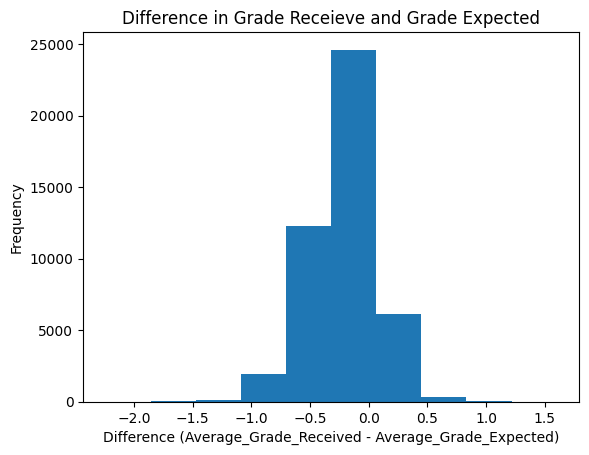

In [15]:
difference_gpa.plot.hist();
plt.xlabel('Difference (Average_Grade_Received - Average_Grade_Expected)')
plt.ylabel('Frequency')
plt.title('Difference in Grade Receieve and Grade Expected')


In [16]:
#Imputed Average_Grade_Received with Average_Grade_Expected with the average difference in GPA!
df['Average_Grade_Received'] = df['Average_Grade_Received'].fillna(df['Average_Grade_Expected'] + difference_gpa.mean() )
df['Average_Grade_Received'] = df['Average_Grade_Received'].round(2)
df

,Instructor,Department,Course,Quarter,Year,Percentage_Responded,Total_Enrolled,Total_Response,Percentage_Recommended_Class,Percentage_Recommended_Professor,Study_Hours_per_Week,Average_Grade_Expected,Average_Grade_Received,Average_Grade_Received_missing
0,Butler Elizabeth Annette,AAS,AAS 10,SP,2023,72.73,66,48,93.5,100.0,2.80,3.84,3.67,False
1,Butler Elizabeth Annette,AAS,AAS 170,SP,2023,35.00,20,7,100.0,100.0,2.50,3.86,3.92,False
2,Jones Ian William Nasser,ANAR,ANAR 111,SP,2023,18.75,16,3,100.0,100.0,3.83,3.67,3.46,True
3,Shtienberg Gilad,ANAR,ANAR 115,SP,2023,23.08,26,6,100.0,83.3,3.83,3.50,3.07,False
4,Braswell Geoffrey E.,ANAR,ANAR 155,SP,2023,40.91,22,9,100.0,100.0,5.17,4.00,4.00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63358,Li Huai,VIS,VIS 105D,SU,2007,76.47,17,13,100.0,100.0,2.33,4.00,3.79,True
63359,Guerrero Raul M.,VIS,VIS 106A,SU,2007,87.50,16,14,92.9,92.9,7.21,3.79,3.58,True
63360,Mangolte Babette,VIS,VIS 194S,SU,2007,71.25,80,57,74.1,26.4,4.27,3.21,3.00,True
63361,Holland Nicole Murphy,VIS,VIS 22,SU,2007,82.50,40,33,100.0,96.7,4.32,3.62,3.41,True


##### Check for NAN in Average_Grade_Received

In [17]:
#There is still 1144 observation that Average_Grade_Received is missing. 
#This means that these observation have both Average_Grade_Received and Average_Grade_Expected missing, which is meaningless for prediction, so we will drop these observations.  
sum(df['Average_Grade_Received'].isna())

1144

In [18]:
df = df.dropna(subset=['Average_Grade_Received']).drop(columns = 'Average_Grade_Expected')
df

,Instructor,Department,Course,Quarter,Year,Percentage_Responded,Total_Enrolled,Total_Response,Percentage_Recommended_Class,Percentage_Recommended_Professor,Study_Hours_per_Week,Average_Grade_Received,Average_Grade_Received_missing
0,Butler Elizabeth Annette,AAS,AAS 10,SP,2023,72.73,66,48,93.5,100.0,2.80,3.67,False
1,Butler Elizabeth Annette,AAS,AAS 170,SP,2023,35.00,20,7,100.0,100.0,2.50,3.92,False
2,Jones Ian William Nasser,ANAR,ANAR 111,SP,2023,18.75,16,3,100.0,100.0,3.83,3.46,True
3,Shtienberg Gilad,ANAR,ANAR 115,SP,2023,23.08,26,6,100.0,83.3,3.83,3.07,False
4,Braswell Geoffrey E.,ANAR,ANAR 155,SP,2023,40.91,22,9,100.0,100.0,5.17,4.00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63358,Li Huai,VIS,VIS 105D,SU,2007,76.47,17,13,100.0,100.0,2.33,3.79,True
63359,Guerrero Raul M.,VIS,VIS 106A,SU,2007,87.50,16,14,92.9,92.9,7.21,3.58,True
63360,Mangolte Babette,VIS,VIS 194S,SU,2007,71.25,80,57,74.1,26.4,4.27,3.00,True
63361,Holland Nicole Murphy,VIS,VIS 22,SU,2007,82.50,40,33,100.0,96.7,4.32,3.41,True


#### Imputation is complete!!

### Analyze the Percentage_Responded column

In [19]:
#The percentage of 109.82 is not adding up - analyze this row
df['Percentage_Responded'].value_counts()

Percentage_Responded
50.00     1782
33.33     1163
100.00     970
40.00      810
66.67      663
          ... 
75.62        1
67.05        1
93.91        1
66.37        1
109.82       1
Name: count, Length: 6220, dtype: int64

In [20]:
# 273/62219  = 0.44% of observation have Percentage_Responded greater that 100%
responding_weird = df[df['Percentage_Responded'] > 100]
responding_weird.shape

(264, 13)

In [21]:
responding_weird

,Instructor,Department,Course,Quarter,Year,Percentage_Responded,Total_Enrolled,Total_Response,Percentage_Recommended_Class,Percentage_Recommended_Professor,Study_Hours_per_Week,Average_Grade_Received,Average_Grade_Received_missing
14419,Moshiri Alexander Niema,CSE,CSE 100,SP,2020,149.73,187,280,97.7,99.6,11.51,3.72,False
19455,Kim Byung Cho,MGT,MGT 177,SP,2019,110.00,10,11,88.9,100.0,5.39,2.42,True
20678,Ehrich Kristine R,MGT,MGT 103,WI,2019,101.52,66,67,92.5,97.0,4.98,3.24,False
20681,Demill Burritt,MGT,MGT 103,WI,2019,109.09,22,24,91.7,91.7,3.83,3.25,False
20692,Zhu Kevin Xiaoguo,MGT,MGT 127,WI,2019,104.17,48,50,92.0,96.0,3.66,3.69,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63247,Orin Adam Edward,PHYS,PHYS 1AL,SU,2007,114.29,14,16,86.7,83.3,4.50,3.48,True
63327,Jules-Rosette Bennetta W.,SOCC,SOCC 157,SU,2007,116.67,12,14,100.0,100.0,6.30,3.79,True
63334,Jules-Rosette Bennetta W.,SOCI,SOCI 157,SU,2007,116.67,12,14,100.0,100.0,6.30,3.79,True
63341,Salovey Todd,TDAC,TDAC 1,SU,2007,107.14,14,15,100.0,100.0,3.97,3.58,True


After discussiong this with Prof Niema (data on row 1) through Prof Shannon, we learned that this specific year is where COVID restriction effected students to attend through zoom. CSE 100 were cotaught with 3 instructors and students were able to attend to any of the favorite lecutres and this caused the evaluation to accept more than the number of students initially enrolled. 

When we are creating a prediction model, we want to avoid the model to think that Percentage_Respondid > 100 is a valid data, so our group decided that it is better to drop these column to avoid confusioins. Additionally, these rows are only 0.44% of the data that we have, so we agreed that it's not going to impact us significantly by dropping these alltogether. 

In [22]:
capes_df = df[df['Percentage_Responded'] <= 100]
capes_df

,Instructor,Department,Course,Quarter,Year,Percentage_Responded,Total_Enrolled,Total_Response,Percentage_Recommended_Class,Percentage_Recommended_Professor,Study_Hours_per_Week,Average_Grade_Received,Average_Grade_Received_missing
0,Butler Elizabeth Annette,AAS,AAS 10,SP,2023,72.73,66,48,93.5,100.0,2.80,3.67,False
1,Butler Elizabeth Annette,AAS,AAS 170,SP,2023,35.00,20,7,100.0,100.0,2.50,3.92,False
2,Jones Ian William Nasser,ANAR,ANAR 111,SP,2023,18.75,16,3,100.0,100.0,3.83,3.46,True
3,Shtienberg Gilad,ANAR,ANAR 115,SP,2023,23.08,26,6,100.0,83.3,3.83,3.07,False
4,Braswell Geoffrey E.,ANAR,ANAR 155,SP,2023,40.91,22,9,100.0,100.0,5.17,4.00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63358,Li Huai,VIS,VIS 105D,SU,2007,76.47,17,13,100.0,100.0,2.33,3.79,True
63359,Guerrero Raul M.,VIS,VIS 106A,SU,2007,87.50,16,14,92.9,92.9,7.21,3.58,True
63360,Mangolte Babette,VIS,VIS 194S,SU,2007,71.25,80,57,74.1,26.4,4.27,3.00,True
63361,Holland Nicole Murphy,VIS,VIS 22,SU,2007,82.50,40,33,100.0,96.7,4.32,3.41,True


##### We are completely done with processing CAPES Dataset!

### Summarizing the cleaned dataset

In [23]:
capes_df.describe()

,Year,Percentage_Responded,Total_Enrolled,Total_Response,Percentage_Recommended_Class,Percentage_Recommended_Professor,Study_Hours_per_Week,Average_Grade_Received
count,61955.000000,61955.000000,61955.000000,61955.000000,61955.000000,61955.000000,61955.000000,61955.000000
mean,2015.633831,51.789316,78.754483,40.110951,89.170196,89.646934,5.686068,3.319299
std,4.654921,20.941183,88.378163,49.208193,12.589835,14.281704,2.525478,0.398172
min,2007.000000,5.000000,3.000000,3.000000,0.000000,0.000000,0.500000,0.550000
25%,2012.000000,36.110000,21.000000,10.000000,83.300000,84.900000,4.040000,3.040000
50%,2016.000000,47.370000,42.000000,20.000000,92.700000,95.000000,5.350000,3.350000
75%,2020.000000,66.265000,105.000000,51.000000,100.000000,100.000000,7.000000,3.650000
max,2023.000000,100.000000,1101.000000,588.000000,100.000000,100.000000,20.500000,4.000000


In [24]:
capes_df.dtypes

Instructor                           object
Department                           object
Course                               object
Quarter                              object
Year                                  int64
Percentage_Responded                float64
Total_Enrolled                        int64
Total_Response                        int64
Percentage_Recommended_Class        float64
Percentage_Recommended_Professor    float64
Study_Hours_per_Week                float64
Average_Grade_Received              float64
Average_Grade_Received_missing         bool
dtype: object

In [25]:
#The dataset is in tidy format!
capes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61955 entries, 0 to 63362
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Instructor                        61955 non-null  object 
 1   Department                        61955 non-null  object 
 2   Course                            61955 non-null  object 
 3   Quarter                           61955 non-null  object 
 4   Year                              61955 non-null  int64  
 5   Percentage_Responded              61955 non-null  float64
 6   Total_Enrolled                    61955 non-null  int64  
 7   Total_Response                    61955 non-null  int64  
 8   Percentage_Recommended_Class      61955 non-null  float64
 9   Percentage_Recommended_Professor  61955 non-null  float64
 10  Study_Hours_per_Week              61955 non-null  float64
 11  Average_Grade_Received            61955 non-null  float64
 12  Average_G

## UC Income Dataset

In [ ]:
start = time.time()

post_url = 'https://ucannualwage.ucop.edu/wage/search.action'

# Specify the range of years you want to include
years = range(2010, 2023)

# Create an empty list to store the dataframes for each year
dfs = []

for year in years:
    form_data = {
        '_search': 'false',
        'nd': '1708407179006',
        'rows': '52000',
        'page': '1',
        'sidx': 'EAW_LST_NAM',
        'sord': 'asc',
        'year': str(year),  # Convert year to string
        'location': 'San Diego',
        'firstname': '',
        'lastname': '',
        'title': '',
        'startSal': '',
        'endSal': ''
    }

    headers = {
        'Accept': 'application/json, text/javascript, */*; q=0.01',
        'Accept-Language': 'en-US,en;q=0.5',
        'Content-Type': 'application/x-www-form-urlencoded',
        'X-Requested-With': 'XMLHttpRequest',
        'Origin': 'https://ucannualwage.ucop.edu',
        'Referer': 'https://ucannualwage.ucop.edu/wage/',
        'Sec-Fetch-Dest': 'empty',
        'Sec-Fetch-Mode': 'cors',
        'Sec-Fetch-Site': 'same-origin'
    }

    response = requests.post(post_url, data=form_data, headers=headers)

    json_data = json.loads(response.text.replace("'", '"'))
    rows = [row["cell"] for row in json_data['rows']]
    df = pd.DataFrame(rows)
    
    # Add a new column for the year
    df['Year'] = year
    
    dfs.append(df)

# Concatenate all dataframes into one
income_df = pd.concat(dfs, ignore_index=True)

# display(final_df.iloc[35780:35797])

# print("Time to parse and dataframeify:", time.time() - start)

In [ ]:
income_df = income_df.rename(columns={1: 'Year', 3: 'First Name', 4: 'Last Name', 5: 'Job Title', 6: 'Income'})
income_df = income_df.iloc[:, [1, 3, 4, 5, 6]]  # Assign the result back to the DataFrame

In [28]:
income_df = income_df[~(income_df['First Name'].str.contains('\*') | income_df['Last Name'].str.contains('\*'))]

We use API endpoints to load in the data using a dictionary. This way we can leverage the backend of the webpage that has the HTML pageinated table to quickly get and create the dataframe of UC San Diego Income data. We originally used selenium and beautiful soup to parse the table. However, due to the large quantity of elements, it took over an hour and a half to complete the creation of the dataframe. This new approach is much faster, taking about 30 seconds. Next, in the 2 code blocks above, we started the cleaning process by renaming the columns to the columns we want (Year, First Name, Last Name, Job Title, and Income), and removed the rest. We then went through and removed censored names. These names are a combination of tutors, TAs, and other faculty that wouldn't be on our CAPES dataset to begin with. After this we print the dataframe below to get our initial dataframe to start working with.

In [26]:
income_df = pd.read_csv('cleaned_income_data.csv')
income_df

,Unnamed: 0,Year,First Name,Last Name,Job Title,Income
0,12350,2010,ERNEST L III,AARON,"TECHNICIAN, DEVELOPMENT, IV",65210.90
1,12351,2010,LOIS M.,AARON,TRANSLATOR/INTERP FOR THE DEAF,1891.54
2,12352,2010,GREGORY A.,AARONS,ASSOCIATE PROF IN RES-HCOMP,170724.59
3,12353,2010,CHARLES O,ABAD,"TECHNICIAN,PATIENT DIALYSI, I",45102.64
4,12354,2010,CONCEPCION ABUTI,ABAD,"CLERK, SR/SECRETARY",29320.17
...,...,...,...,...,...,...
362645,548579,2022,THOMAS,ZUST,ELECTR TCHN,68109.00
362646,548580,2022,MARGARET,ZVIRZDIN,PAT RCDS ABSTRACTOR 3,94538.00
362647,548581,2022,JANE,ZWERNEMAN,BLANK AST 3,90684.00
362648,548582,2022,MEGAN,ZYNKIAN,CLIN NURSE 3,117645.00


In [27]:
null_values = income_df.isnull().any()
null_values

Unnamed: 0    False
Year          False
First Name     True
Last Name      True
Job Title      True
Income        False
dtype: bool

We can see from this, we have null values in the columns of First Name, Last Name, and Job Title. While we have removed censored names, we have to incorporate for true null values. We will remove any null first and last names first since they wouldn't correspond with our CAPES dataset anyways.

In [28]:
income_df = income_df.dropna(subset=['First Name', 'Last Name'])
null_values = income_df.isnull().any()
null_values

Unnamed: 0    False
Year          False
First Name    False
Last Name     False
Job Title      True
Income        False
dtype: bool

In [29]:
income_df.shape

(362602, 6)

We've removed all rows where there are null values. We will leave the Job Title column for now until after we cross reference to see if those employees are in the CAPES Dataset. If they aren't then those rows will be removed. If they are, then we can manually go in and input their Job Title and Department. After removing null names, this dataset dropped by 48 entries to become 352,602 entries.

The next thing we want to do is remove individuals who aren't professors/lecturers. Basically, anyone that isn't be on the capes dataset won't be in the dataframe for the income. Leaving all individuals in the dataframe would present a confound as it would skew or alter the data in our analysis to have people who arent teaching impacting our conclusion. We will create a function below that can ensure that everyone in the income dataset is in the capes data set to ensure we have more internal validity in this dataset.

In [30]:
# Create a new column "Name" by combining "First Name" and "Last Name"
income_df['Name'] = income_df['First Name'] + ' ' + income_df['Last Name']

name_index = 2

income_df.insert(name_index, 'Name', income_df.pop('Name'))
income_df

,Unnamed: 0,Year,Name,First Name,Last Name,Job Title,Income
0,12350,2010,ERNEST L III AARON,ERNEST L III,AARON,"TECHNICIAN, DEVELOPMENT, IV",65210.90
1,12351,2010,LOIS M. AARON,LOIS M.,AARON,TRANSLATOR/INTERP FOR THE DEAF,1891.54
2,12352,2010,GREGORY A. AARONS,GREGORY A.,AARONS,ASSOCIATE PROF IN RES-HCOMP,170724.59
3,12353,2010,CHARLES O ABAD,CHARLES O,ABAD,"TECHNICIAN,PATIENT DIALYSI, I",45102.64
4,12354,2010,CONCEPCION ABUTI ABAD,CONCEPCION ABUTI,ABAD,"CLERK, SR/SECRETARY",29320.17
...,...,...,...,...,...,...,...
362645,548579,2022,THOMAS ZUST,THOMAS,ZUST,ELECTR TCHN,68109.00
362646,548580,2022,MARGARET ZVIRZDIN,MARGARET,ZVIRZDIN,PAT RCDS ABSTRACTOR 3,94538.00
362647,548581,2022,JANE ZWERNEMAN,JANE,ZWERNEMAN,BLANK AST 3,90684.00
362648,548582,2022,MEGAN ZYNKIAN,MEGAN,ZYNKIAN,CLIN NURSE 3,117645.00


# Remove punctuation on both dataframe

We then created a function to remove the punctuation and lowercase all the capital letters in the names of the professors. This will allow us to merge the 2 dataframes into 1 big dataframe


In [31]:
# Removes punctuation from a string input
def remove_punctuation(input_string):
    
    clean_punc = str(re.sub(r'[^a-zA-Z1-9\s]', '', input_string))

    clean_string = clean_punc.lower()
    
    return clean_string

In [32]:
income_df = income_df.assign(Name = income_df["Name"].apply(remove_punctuation))
income_df

,Unnamed: 0,Year,Name,First Name,Last Name,Job Title,Income
0,12350,2010,ernest l iii aaron,ERNEST L III,AARON,"TECHNICIAN, DEVELOPMENT, IV",65210.90
1,12351,2010,lois m aaron,LOIS M.,AARON,TRANSLATOR/INTERP FOR THE DEAF,1891.54
2,12352,2010,gregory a aarons,GREGORY A.,AARONS,ASSOCIATE PROF IN RES-HCOMP,170724.59
3,12353,2010,charles o abad,CHARLES O,ABAD,"TECHNICIAN,PATIENT DIALYSI, I",45102.64
4,12354,2010,concepcion abuti abad,CONCEPCION ABUTI,ABAD,"CLERK, SR/SECRETARY",29320.17
...,...,...,...,...,...,...,...
362645,548579,2022,thomas zust,THOMAS,ZUST,ELECTR TCHN,68109.00
362646,548580,2022,margaret zvirzdin,MARGARET,ZVIRZDIN,PAT RCDS ABSTRACTOR 3,94538.00
362647,548581,2022,jane zwerneman,JANE,ZWERNEMAN,BLANK AST 3,90684.00
362648,548582,2022,megan zynkian,MEGAN,ZYNKIAN,CLIN NURSE 3,117645.00


In [33]:
capes_df = capes_df[(capes_df['Department'] != "ANPR") & (capes_df['Year'] != 2023) & (capes_df['Year'] >= 2010)]
capes_df

,Instructor,Department,Course,Quarter,Year,Percentage_Responded,Total_Enrolled,Total_Response,Percentage_Recommended_Class,Percentage_Recommended_Professor,Study_Hours_per_Week,Average_Grade_Received,Average_Grade_Received_missing
2660,Butler Elizabeth Annette,AAS,AAS 10,FA,2022,28.99,69,20,70.0,75.0,3.70,3.80,False
2661,Butler Elizabeth Annette,AAS,AAS 170,FA,2022,29.03,31,9,88.9,88.9,3.61,3.68,False
2662,Fortier Jana,ANAR,ANAR 100,FA,2022,15.00,20,3,100.0,100.0,3.17,3.30,False
2663,Smith Neil Gordon,ANAR,ANAR 104,FA,2022,25.00,16,4,100.0,100.0,4.00,3.79,True
2664,Jones Ian William Nasser,ANAR,ANAR 120,FA,2022,18.75,16,3,100.0,100.0,6.50,3.46,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55097,Hendrickson Laura M.,VIS,VIS 22,WI,2010,36.59,164,60,66.7,23.3,3.73,3.49,False
55098,Greenstein Jack M,VIS,VIS 23,WI,2010,58.82,17,10,60.0,100.0,3.30,3.29,True
55099,Stalbaum Brett,VIS,VIS 40,WI,2010,34.31,102,35,65.7,82.9,4.56,3.57,False
55100,Anderson Shane Nicholas,VIS,VIS 60,WI,2010,34.41,93,32,96.9,96.9,7.06,3.11,False


In [34]:
capes_df = capes_df.assign(Instructor = capes_df['Instructor'].apply(remove_punctuation))
capes_df

,Instructor,Department,Course,Quarter,Year,Percentage_Responded,Total_Enrolled,Total_Response,Percentage_Recommended_Class,Percentage_Recommended_Professor,Study_Hours_per_Week,Average_Grade_Received,Average_Grade_Received_missing
2660,butler elizabeth annette,AAS,AAS 10,FA,2022,28.99,69,20,70.0,75.0,3.70,3.80,False
2661,butler elizabeth annette,AAS,AAS 170,FA,2022,29.03,31,9,88.9,88.9,3.61,3.68,False
2662,fortier jana,ANAR,ANAR 100,FA,2022,15.00,20,3,100.0,100.0,3.17,3.30,False
2663,smith neil gordon,ANAR,ANAR 104,FA,2022,25.00,16,4,100.0,100.0,4.00,3.79,True
2664,jones ian william nasser,ANAR,ANAR 120,FA,2022,18.75,16,3,100.0,100.0,6.50,3.46,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55097,hendrickson laura m,VIS,VIS 22,WI,2010,36.59,164,60,66.7,23.3,3.73,3.49,False
55098,greenstein jack m,VIS,VIS 23,WI,2010,58.82,17,10,60.0,100.0,3.30,3.29,True
55099,stalbaum brett,VIS,VIS 40,WI,2010,34.31,102,35,65.7,82.9,4.56,3.57,False
55100,anderson shane nicholas,VIS,VIS 60,WI,2010,34.41,93,32,96.9,96.9,7.06,3.11,False


In [35]:
income_df = (income_df.assign(first_name = income_df['First Name'].apply(remove_punctuation))
             .assign(last_name = income_df['Last Name'].apply(remove_punctuation)))
income_df

,Unnamed: 0,Year,Name,First Name,Last Name,Job Title,Income,first_name,last_name
0,12350,2010,ernest l iii aaron,ERNEST L III,AARON,"TECHNICIAN, DEVELOPMENT, IV",65210.90,ernest l iii,aaron
1,12351,2010,lois m aaron,LOIS M.,AARON,TRANSLATOR/INTERP FOR THE DEAF,1891.54,lois m,aaron
2,12352,2010,gregory a aarons,GREGORY A.,AARONS,ASSOCIATE PROF IN RES-HCOMP,170724.59,gregory a,aarons
3,12353,2010,charles o abad,CHARLES O,ABAD,"TECHNICIAN,PATIENT DIALYSI, I",45102.64,charles o,abad
4,12354,2010,concepcion abuti abad,CONCEPCION ABUTI,ABAD,"CLERK, SR/SECRETARY",29320.17,concepcion abuti,abad
...,...,...,...,...,...,...,...,...,...
362645,548579,2022,thomas zust,THOMAS,ZUST,ELECTR TCHN,68109.00,thomas,zust
362646,548580,2022,margaret zvirzdin,MARGARET,ZVIRZDIN,PAT RCDS ABSTRACTOR 3,94538.00,margaret,zvirzdin
362647,548581,2022,jane zwerneman,JANE,ZWERNEMAN,BLANK AST 3,90684.00,jane,zwerneman
362648,548582,2022,megan zynkian,MEGAN,ZYNKIAN,CLIN NURSE 3,117645.00,megan,zynkian


# SPLIT CAPES INTO FIRST AND LAST NAME

In [36]:
last_name = capes_df['Instructor'].str.split().str[0]
last_name

2660          butler
2661          butler
2662         fortier
2663           smith
2664           jones
            ...     
55097    hendrickson
55098     greenstein
55099       stalbaum
55100       anderson
55101          gorin
Name: Instructor, Length: 51449, dtype: object

In [37]:
first_name = capes_df['Instructor'].str.split().str[1]
first_name

2660      elizabeth
2661      elizabeth
2662           jana
2663           neil
2664            ian
            ...    
55097         laura
55098          jack
55099         brett
55100         shane
55101    jeanpierre
Name: Instructor, Length: 51449, dtype: object

In [38]:
capes_df = capes_df.assign(last_name = last_name).assign(first_name = first_name)

In [39]:
capes_df

,Instructor,Department,Course,Quarter,Year,Percentage_Responded,Total_Enrolled,Total_Response,Percentage_Recommended_Class,Percentage_Recommended_Professor,Study_Hours_per_Week,Average_Grade_Received,Average_Grade_Received_missing,last_name,first_name
2660,butler elizabeth annette,AAS,AAS 10,FA,2022,28.99,69,20,70.0,75.0,3.70,3.80,False,butler,elizabeth
2661,butler elizabeth annette,AAS,AAS 170,FA,2022,29.03,31,9,88.9,88.9,3.61,3.68,False,butler,elizabeth
2662,fortier jana,ANAR,ANAR 100,FA,2022,15.00,20,3,100.0,100.0,3.17,3.30,False,fortier,jana
2663,smith neil gordon,ANAR,ANAR 104,FA,2022,25.00,16,4,100.0,100.0,4.00,3.79,True,smith,neil
2664,jones ian william nasser,ANAR,ANAR 120,FA,2022,18.75,16,3,100.0,100.0,6.50,3.46,True,jones,ian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55097,hendrickson laura m,VIS,VIS 22,WI,2010,36.59,164,60,66.7,23.3,3.73,3.49,False,hendrickson,laura
55098,greenstein jack m,VIS,VIS 23,WI,2010,58.82,17,10,60.0,100.0,3.30,3.29,True,greenstein,jack
55099,stalbaum brett,VIS,VIS 40,WI,2010,34.31,102,35,65.7,82.9,4.56,3.57,False,stalbaum,brett
55100,anderson shane nicholas,VIS,VIS 60,WI,2010,34.41,93,32,96.9,96.9,7.06,3.11,False,anderson,shane


# Take the first name only for income_df (drop the middle name abvreviation)

In [40]:
first_name = income_df['first_name'].str.split().str[0]
first_name

0             ernest
1               lois
2            gregory
3            charles
4         concepcion
             ...    
362645        thomas
362646      margaret
362647          jane
362648         megan
362649         colin
Name: first_name, Length: 362602, dtype: object

In [41]:
income_df = income_df.assign(first_name = first_name)
income_df

,Unnamed: 0,Year,Name,First Name,Last Name,Job Title,Income,first_name,last_name
0,12350,2010,ernest l iii aaron,ERNEST L III,AARON,"TECHNICIAN, DEVELOPMENT, IV",65210.90,ernest,aaron
1,12351,2010,lois m aaron,LOIS M.,AARON,TRANSLATOR/INTERP FOR THE DEAF,1891.54,lois,aaron
2,12352,2010,gregory a aarons,GREGORY A.,AARONS,ASSOCIATE PROF IN RES-HCOMP,170724.59,gregory,aarons
3,12353,2010,charles o abad,CHARLES O,ABAD,"TECHNICIAN,PATIENT DIALYSI, I",45102.64,charles,abad
4,12354,2010,concepcion abuti abad,CONCEPCION ABUTI,ABAD,"CLERK, SR/SECRETARY",29320.17,concepcion,abad
...,...,...,...,...,...,...,...,...,...
362645,548579,2022,thomas zust,THOMAS,ZUST,ELECTR TCHN,68109.00,thomas,zust
362646,548580,2022,margaret zvirzdin,MARGARET,ZVIRZDIN,PAT RCDS ABSTRACTOR 3,94538.00,margaret,zvirzdin
362647,548581,2022,jane zwerneman,JANE,ZWERNEMAN,BLANK AST 3,90684.00,jane,zwerneman
362648,548582,2022,megan zynkian,MEGAN,ZYNKIAN,CLIN NURSE 3,117645.00,megan,zynkian


# Merging!

## Before we merge, drop columns that are unnecessary

In [42]:
income_df = income_df[["Year", "Name", "first_name", "last_name", "Job Title", "Income"]]
income_df

,Year,Name,first_name,last_name,Job Title,Income
0,2010,ernest l iii aaron,ernest,aaron,"TECHNICIAN, DEVELOPMENT, IV",65210.90
1,2010,lois m aaron,lois,aaron,TRANSLATOR/INTERP FOR THE DEAF,1891.54
2,2010,gregory a aarons,gregory,aarons,ASSOCIATE PROF IN RES-HCOMP,170724.59
3,2010,charles o abad,charles,abad,"TECHNICIAN,PATIENT DIALYSI, I",45102.64
4,2010,concepcion abuti abad,concepcion,abad,"CLERK, SR/SECRETARY",29320.17
...,...,...,...,...,...,...
362645,2022,thomas zust,thomas,zust,ELECTR TCHN,68109.00
362646,2022,margaret zvirzdin,margaret,zvirzdin,PAT RCDS ABSTRACTOR 3,94538.00
362647,2022,jane zwerneman,jane,zwerneman,BLANK AST 3,90684.00
362648,2022,megan zynkian,megan,zynkian,CLIN NURSE 3,117645.00


In [43]:
merged_df = pd.merge(capes_df, income_df, left_on=['Year', 'last_name', 'first_name'], right_on=['Year', 'last_name', 'first_name'])

In [44]:
merged_df

,Instructor,Department,Course,Quarter,Year,Percentage_Responded,Total_Enrolled,Total_Response,Percentage_Recommended_Class,Percentage_Recommended_Professor,Study_Hours_per_Week,Average_Grade_Received,Average_Grade_Received_missing,last_name,first_name,Name,Job Title,Income
0,fortier jana,ANAR,ANAR 100,FA,2022,15.00,20,3,100.0,100.0,3.17,3.30,False,fortier,jana,jana fortier,LECT-AY-1/9,38694.00
1,smith neil gordon,ANAR,ANAR 104,FA,2022,25.00,16,4,100.0,100.0,4.00,3.79,True,smith,neil,neil smith,LECT-AY-1/9,49934.00
2,jones ian william nasser,ANAR,ANAR 120,FA,2022,18.75,16,3,100.0,100.0,6.50,3.46,True,jones,ian,ian jones,LECT-AY,65471.00
3,goldstein paul s,ANAR,ANAR 143,FA,2022,32.00,25,8,100.0,100.0,1.36,3.85,False,goldstein,paul,paul goldstein,PROF-AY,177497.00
4,marchetto maria carolina,ANBI,ANBI 100,FA,2022,46.67,30,14,100.0,100.0,1.93,3.99,False,marchetto,maria,maria marchetto,ASST PROF-AY,154318.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45002,dominguez ricardo,VIS,VIS 2,WI,2010,37.68,138,52,59.6,74.5,4.77,3.37,False,dominguez,ricardo,ricardo rene dominguez,ASSOCIATE PROFESSOR-ACAD YR,66075.32
45003,hendrickson laura m,VIS,VIS 22,WI,2010,36.59,164,60,66.7,23.3,3.73,3.49,False,hendrickson,laura,laura m hendrickson,LECTURER - ACADEMIC YEAR - 1/9,17259.24
45004,greenstein jack m,VIS,VIS 23,WI,2010,58.82,17,10,60.0,100.0,3.30,3.29,True,greenstein,jack,jack m greenstein,ASSOCIATE PROFESSOR-ACAD YR,79794.00
45005,stalbaum brett,VIS,VIS 40,WI,2010,34.31,102,35,65.7,82.9,4.56,3.57,False,stalbaum,brett,brett o stalbaum,LECTURER W/SEC EMPL-ACAD YR,60414.64


# Results

## Exploratory Data Analysis

Carry out whatever EDA you need to for your project.  Because every project will be different we can't really give you much of a template at this point. But please make sure you describe the what and why in text here as well as providing interpretation of results and context.

### EDA of CAPED data

#### Number of Courses per Department 

There are unequal numbers of courses per department and this would effect the prediction model if there is not enough data for a specific department. 

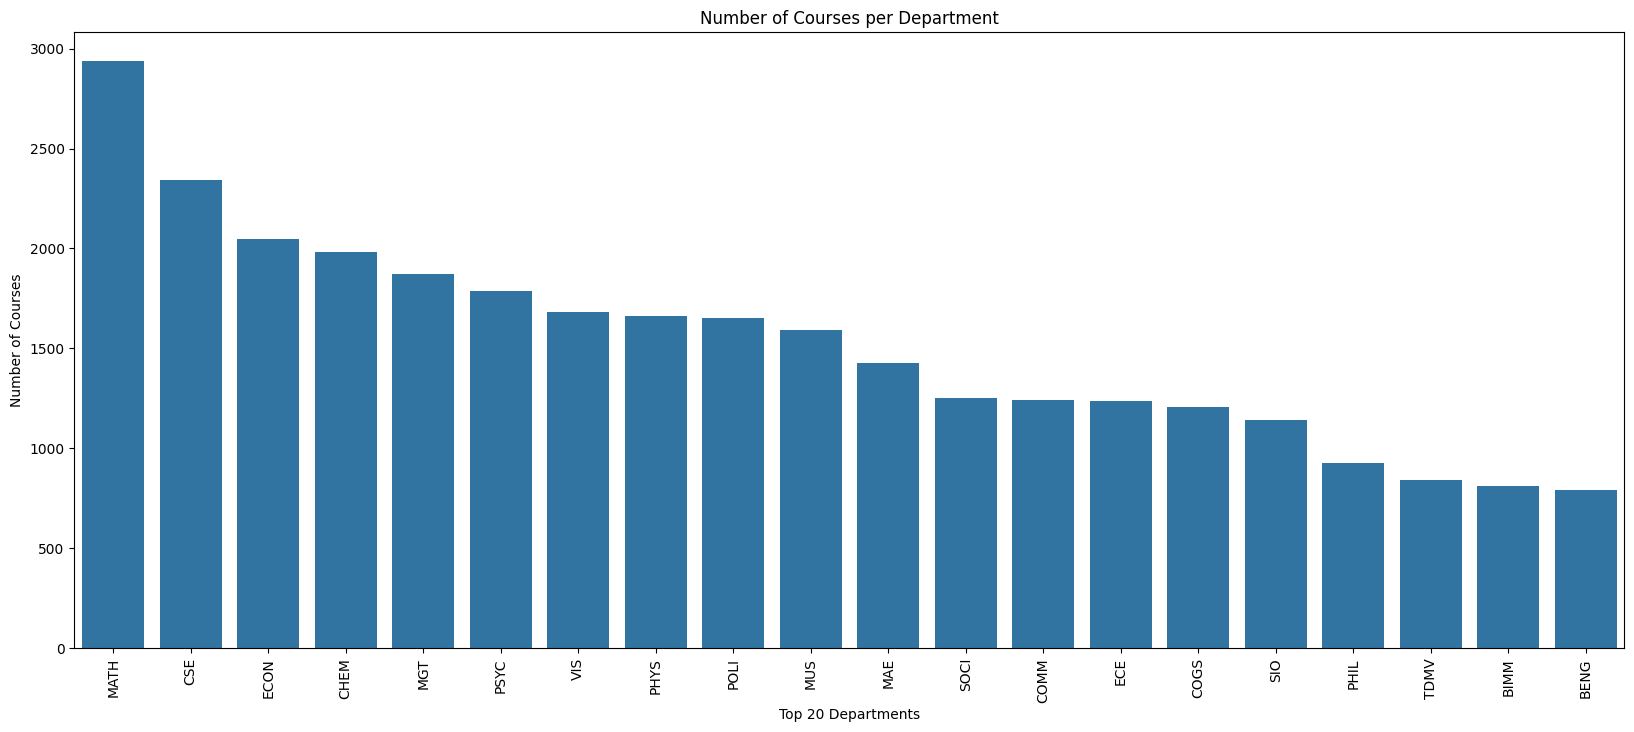

In [46]:
# Number of Courses per Department 
courses_per_department = capes_df['Department'].value_counts().nlargest(20).reset_index()
courses_per_department.columns = ['Department', 'Number of Courses']

plt.figure(figsize=(20, 8))
plot = sns.barplot(data=courses_per_department, x='Department', y='Number of Courses')
plt.title('Number of Courses per Department')
plt.xlabel('Top 20 Departments')
plt.ylabel('Number of Courses')
plt.xticks(rotation=90) 
plt.show()

# Courses in certain departments will not have a lot of data to create a good prediction model 
# Can split this up into departments that have over 100 courses and departments that have less than 100 courses 


What this shows us is that in the top 20 most populated departments, the majority of them are classified as STEM departments. This is something we expected going into this study as we knew UCSD was predominantly STEM based. With more courses being STEM based, that conversely means that most students are in the STEM fields as well. There is clearly a higher demand for those courses at UCSD, which allocates more resources for those departments.

In [48]:
# # Number of Courses per Department 
# # Split departments based on the number of courses
# large_departments = courses_per_department[courses_per_department['Number of Courses'] > 100]
# small_departments = courses_per_department[courses_per_department['Number of Courses'] <= 100]

# # Plotting
# plt.figure(figsize=(16, 12))

# # Plot for large departments
# plt.subplot(2, 1, 1)
# sns.barplot(data=large_departments, x='Department', y='Number of Courses', palette='viridis', hue='Department')
# plt.title('Departments with Over 100 Courses')
# plt.xlabel('Department')
# plt.ylabel('Number of Courses')
# plt.xticks(rotation=90)

# # Plot for small departments
# plt.subplot(2, 1, 2)
# sns.barplot(data=small_departments, x='Department', y='Number of Courses', palette='viridis', hue='Department')
# plt.title('Departments with 100 or Fewer Courses')
# plt.xlabel('Department')
# plt.ylabel('Number of Courses')
# plt.xticks(rotation=90)



# plt.tight_layout()
# plt.show()

# SEEMS REDUNDANT WITH WHAT IS SHOWN ABOVE

#### Average GPA over the Years and Average Percentage of Respondents over the Years

The GPA has been on an upward trend from since 2007. However we see that the higher the percentage of respondents there are in a year the lower the average GPA. For instance, we see that the percentage of respondents in 2007 is under 3.2 while the average percentage of respondents is over 70% (substanially higher than the years 2010 and on). There may be some sort of correlation between the two factors.

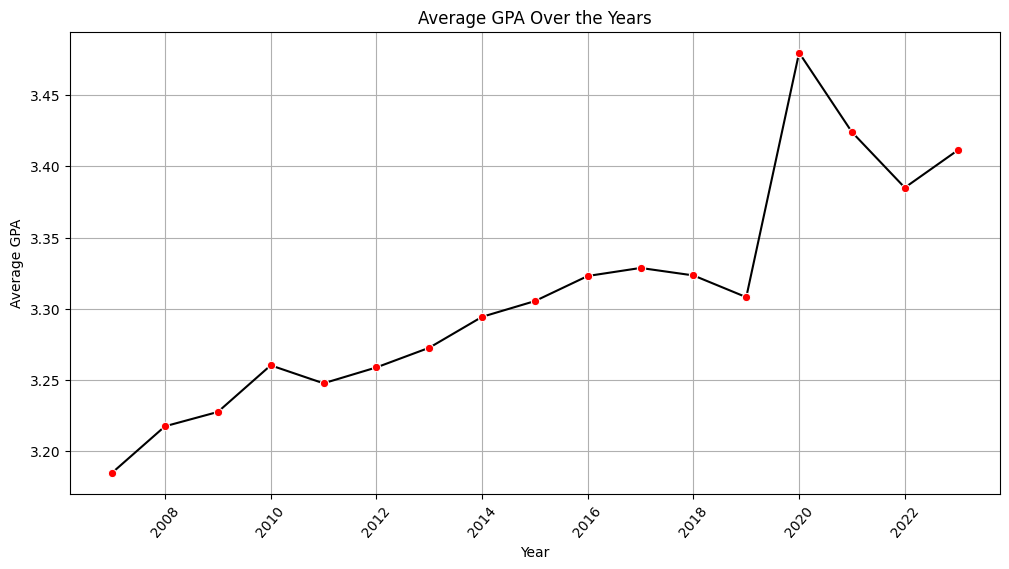

In [35]:
# Calculate average GPA over the years
average_gpa_over_years = capes_df.groupby('Year')['Average_Grade_Received'].mean().reset_index()

plt.figure(figsize=(12, 6))
plot = sns.lineplot(data=average_gpa_over_years, x='Year', y='Average_Grade_Received', color = 'black', marker = 'o', markerfacecolor='red')
plot.lines[0].set_color('black')
plot.collections[0].set_color('red')
plt.title('Average GPA Over the Years')
plt.xlabel('Year')
plt.ylabel('Average GPA')
plt.xticks(rotation=50)
plt.grid(True)
plt.show()



We see a steady increase in average GPA over the years which can be attributed to more resources and support for students, with technology being more accessible. It's also important to note the spike in grades achieved in 2020 which has a direct correlation to the COVID pandemic which forced all classes to go online. This opened the classes to a variety of online resources, notes, and cheating. The grade inflation hasn't come down yet to where it would be expected to be at mainly because in the current day, we're still a hybrid school with classes being supported remotely.

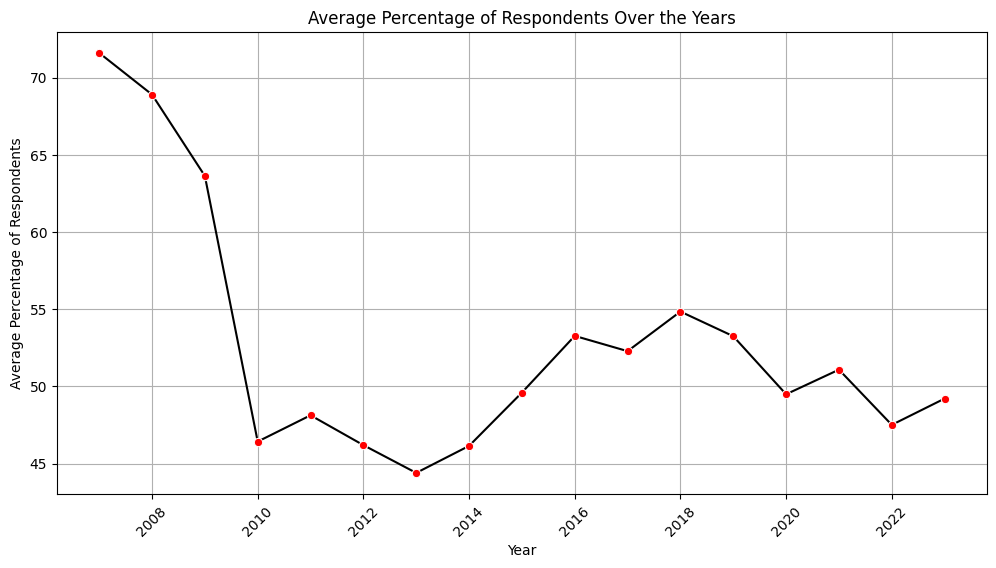

In [36]:
# Calculate mean percentage of respondents by year
mean_percentage_responded_by_year = capes_df.groupby('Year')['Percentage_Responded'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=mean_percentage_responded_by_year, x='Year', y='Percentage_Responded', color = 'black', marker = 'o', markerfacecolor='red')

plt.title('Average Percentage of Respondents Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Percentage of Respondents')
plt.xticks(rotation=45) 
plt.grid(True)
plt.show()

# There is a very high percentage of Respondents in 2007, 2008 however it dramatically decreases over the years
# So in the Average GPA over the years graph we see that the more respondents there are on average the lower the GPA is

From 2007 to 2008 we see a massive drop down in the average percentage of respondents. That's followed by a slow increase and a peak in 2018. The reasons for the drop are not known to us. It could be a change in incentive for students to fill out the form. 

#### The Relationship Between Percentage Recommended Class and Percentage Recommended Professor 

We can see a large cluster towards the upper right side, illustrating the higher the percentage recommended class the higher the percentage recommended professor. However there are outliers where a class can be very highly recommended while the professor is not and vice versa. It's shown by the scatterplot below that generally, students fill out the Capes review survey when they have something good to say about the professor.

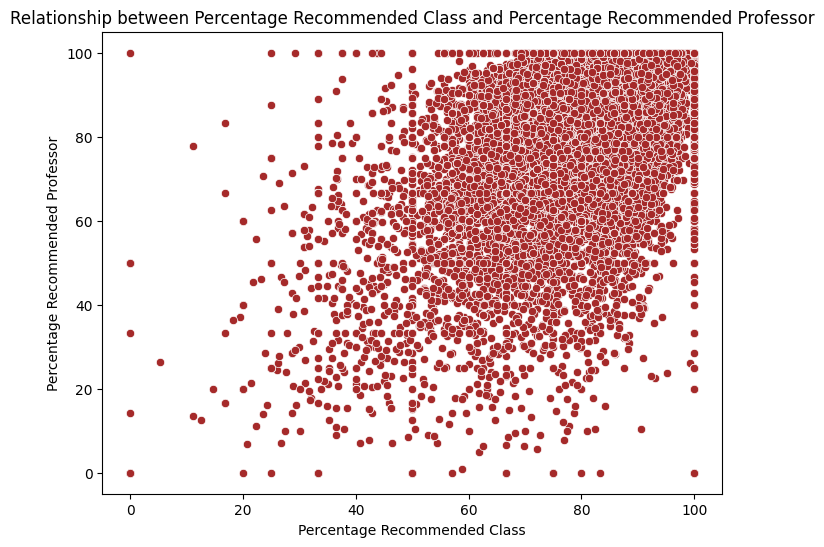

In [49]:
# Calculate the relationship between the Percentage Recommended Class and Percentage Recommended Professor 
plt.figure(figsize=(8, 6))
sns.scatterplot(data=capes_df, x='Percentage_Recommended_Class', y='Percentage_Recommended_Professor', color = 'brown')
plt.title('Relationship between Percentage Recommended Class and Percentage Recommended Professor')
plt.xlabel('Percentage Recommended Class')
plt.ylabel('Percentage Recommended Professor')
plt.show()

# We can see on average the more students recommended a class the more they would recommend that professor 

In [50]:
top_departments = capes_df['Department'].value_counts().nlargest(20).index

In [51]:
top_capes_df = capes_df[capes_df['Department'].isin(top_departments)]

In [52]:
avg_dep = top_capes_df.groupby("Department")["Average_Grade_Received"].mean().sort_values(ascending=False)

Text(0, 0.5, 'Department')

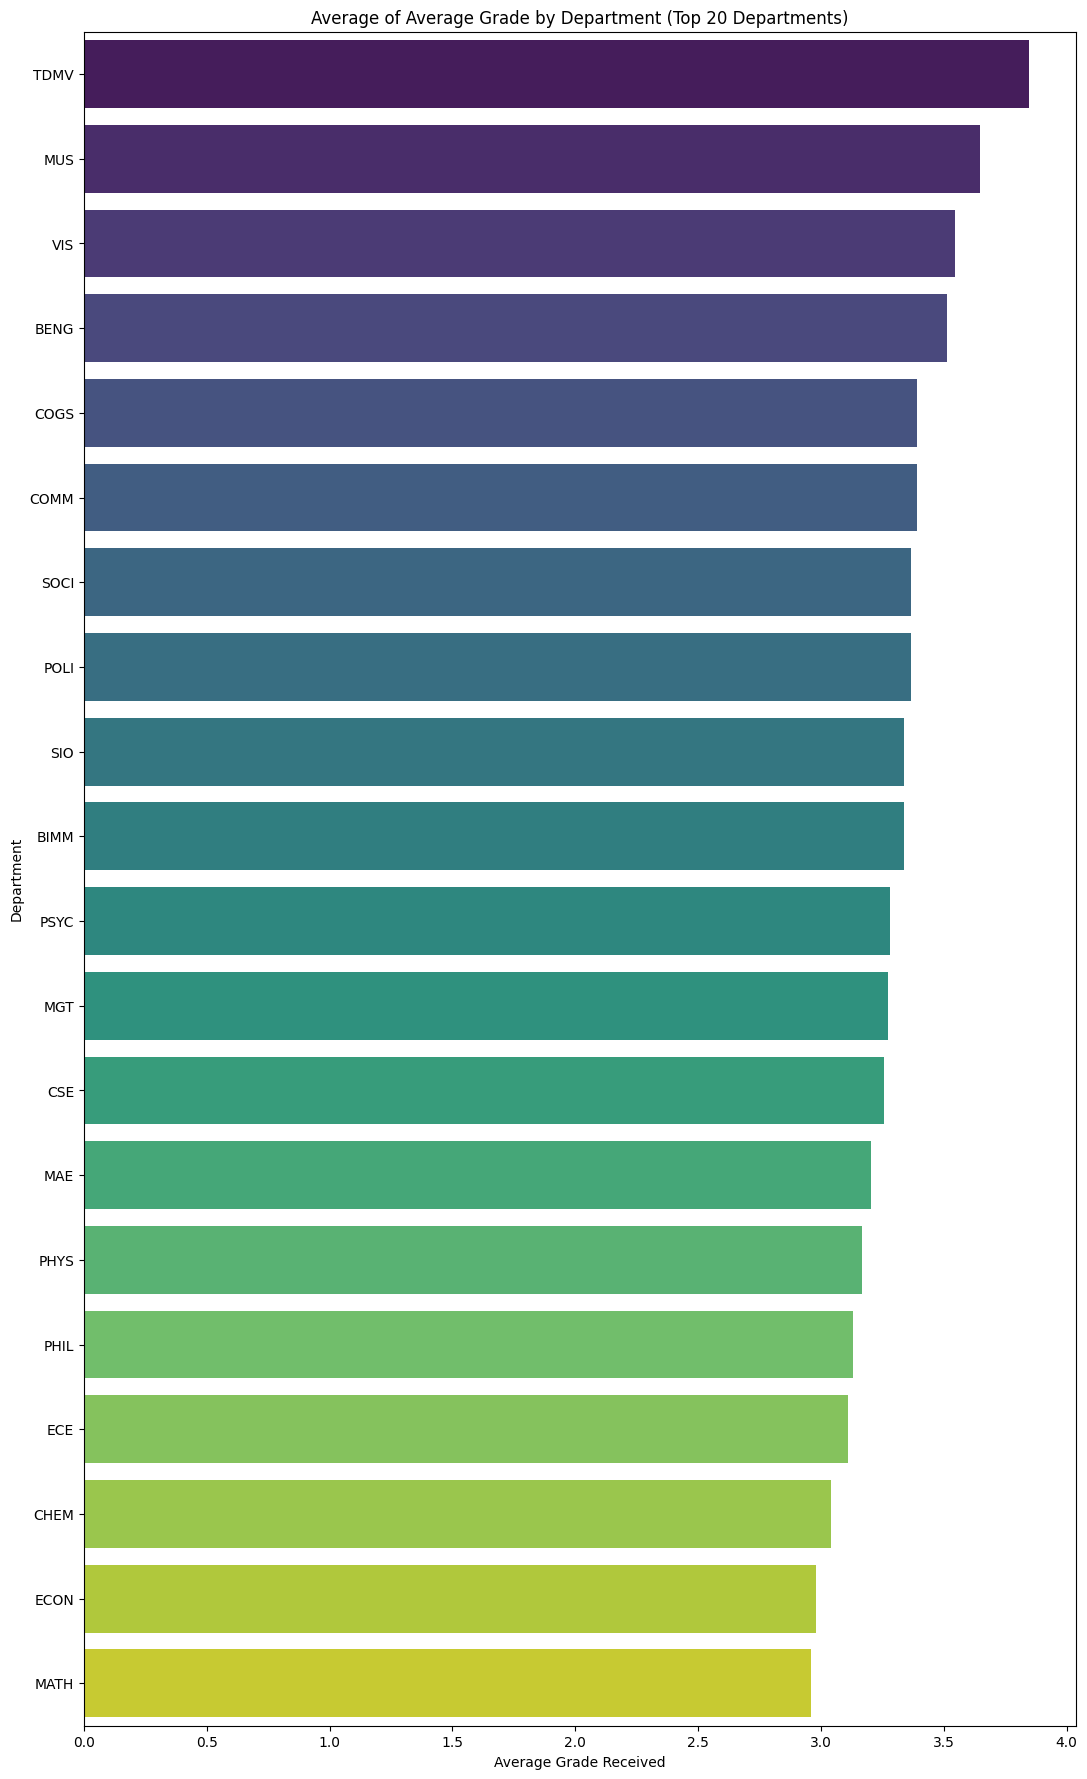

In [54]:
plt.figure(figsize=(12.8, 22))
sns.barplot(x=avg_dep.values, y=avg_dep.index, orient='h', palette='viridis')

plt.title('Average of Average Grade by Department (Top 20 Departments)')
plt.xlabel('Average Grade Received')
plt.ylabel('Department')

Department With Lowest GPA

In [78]:
avg_dep.index[avg_dep.argmin()], avg_dep.iloc[avg_dep.argmin()]

('MATH', 2.9454634146341463)

Department With Highest GPA

In [9]:
avg_dep.index[avg_dep.argmax()], avg_dep.iloc[avg_dep.argmax()]

NameError: name 'avg_dep' is not defined

What we learn from this barplot is that the departments that are most populated and demanded are also the hardest departments. The departments outside of STEM are the ones with the higher GPA which can be attributed to a lighter work load and complexity of classes. There are of course other factors contributing to this, such as class style, grading policies, etc. 

In [56]:
avg_qtr_received = capes_df.groupby(["Year","Quarter"])["Average_Grade_Received"].mean()

Text(0, 0.5, 'Average GPA')

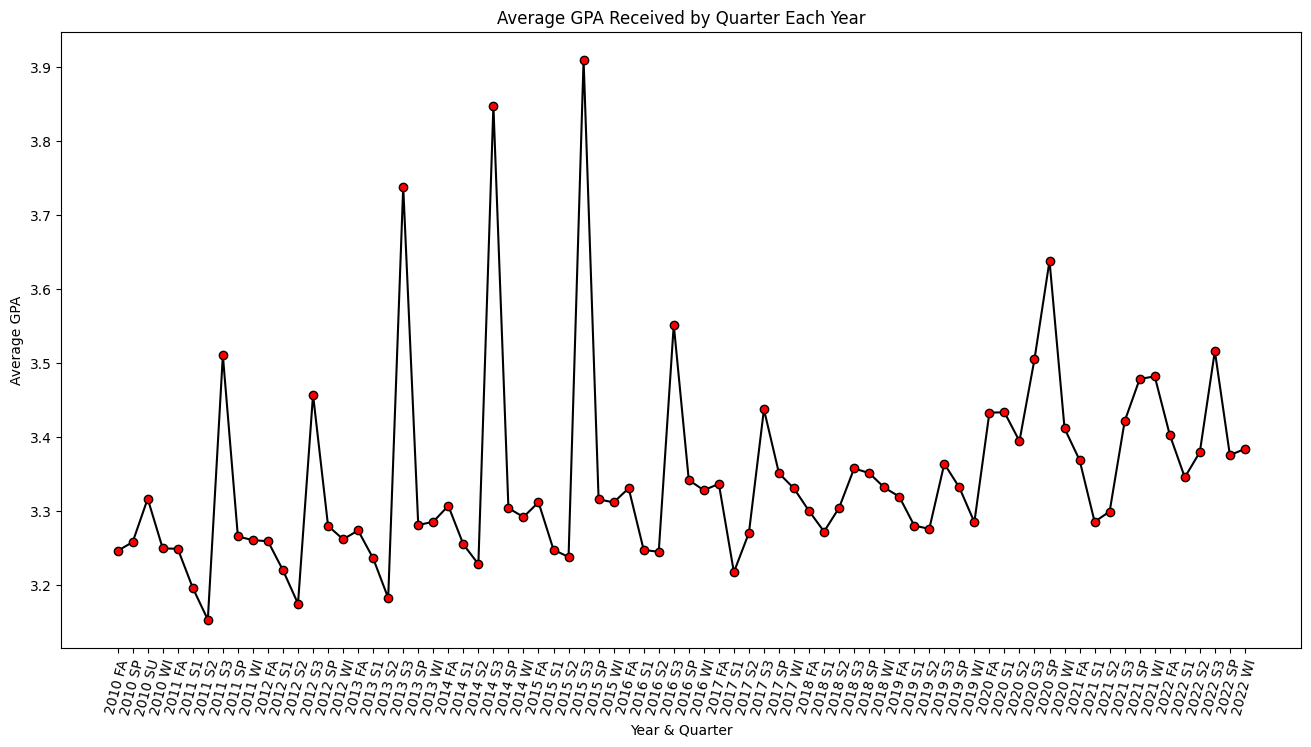

In [57]:
years, quarters, values = zip(*[(year, quarter, value) for (year, quarter), value in avg_qtr_received.items()])

# Plotting
plt.figure(figsize=(16, 8))
plt.plot(range(len(values)), values, color = 'black', marker = 'o', markerfacecolor = 'red')
plt.xticks(range(len(values)), ['{} {}'.format(year, quarter) for year, quarter in zip(years, quarters)], rotation=75)
plt.title('Average GPA Received by Quarter Each Year')
plt.xlabel('Year & Quarter')
plt.ylabel('Average GPA')

### Income Database EDA 

#### Average Income (before splitting by department)

In [64]:
# Get the different types of data in each column to make sure we can get the average value for income
income_df.dtypes

Year            int64
Name           object
first_name     object
last_name      object
Job Title      object
Income        float64
dtype: object

In [65]:
income_df.describe()

,Year,Income
count,89179.000000,8.917900e+04
mean,2015.799347,1.120181e+05
std,3.796760,1.270176e+05
min,2010.000000,-4.000000e+02
25%,2012.000000,3.776622e+04
50%,2016.000000,6.628300e+04
75%,2019.000000,1.453580e+05
max,2022.000000,1.936497e+06


In [66]:
# Get the average value of the income column before splitting by department
# average_income = income_df['Income'].mean()
average_income = round(income_df['Income'].mean(), 2)
print("$" + str(average_income))

$112018.14


We can look at the income data and describe how it looks.

In [67]:
income_df['Income'].describe()

count    8.917900e+04
mean     1.120181e+05
std      1.270176e+05
min     -4.000000e+02
25%      3.776622e+04
50%      6.628300e+04
75%      1.453580e+05
max      1.936497e+06
Name: Income, dtype: float64

In [68]:
income_df = income_df.rename(columns={0: 'Index'})
# income_df.head()
income_df.describe()

,Year,Income
count,89179.000000,8.917900e+04
mean,2015.799347,1.120181e+05
std,3.796760,1.270176e+05
min,2010.000000,-4.000000e+02
25%,2012.000000,3.776622e+04
50%,2016.000000,6.628300e+04
75%,2019.000000,1.453580e+05
max,2022.000000,1.936497e+06


In [113]:
# print(income_df['Job Title'].unique())
unique_jobs = income_df['Job Title'].unique()
# print(len(unique_jobs))

We will get the average of all the incomes from each year and try to plot them on a bar graph to see the general trend of income for each year

In [114]:
average_income_years = income_df.groupby('Year')['Income'].mean().round(2).tolist()
# average_income_years
average_df = income_df.groupby('Year')['Income'].mean().round(2).reset_index()

# Rename the columns for clarity
average_df.columns = ['Year', 'Average Income']
average_df

,Year,Average Income
0,2010,76582.46
1,2011,78908.09
2,2012,92842.24
3,2013,95064.40
4,2014,99414.57
5,2015,102251.37
6,2016,108693.18
7,2017,121322.33
8,2018,124255.85
9,2019,131166.06


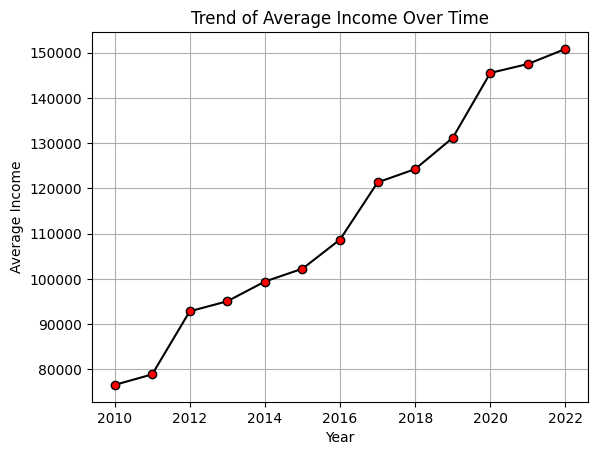

In [115]:
# Plotting trends of income over the 13 years
plt.plot(average_df['Year'], average_df['Average Income'], color = 'black', marker = 'o', markerfacecolor = 'red')
plt.xlabel('Year')
plt.ylabel('Average Income')
plt.title('Trend of Average Income Over Time')
plt.grid(True)
plt.show()

The trend of average income increases as each year goes on. This can be accounted for by inflation rates and as the school increases, more resources are needed to be allocated for the professors who teach the courses. We saw above how STEM departments have more courses, which comes to show they're more demanded. Those departments cost the most in terms of resource allocation, and coupled with general increase in school size and department size, it explains how incomes are going up as well.

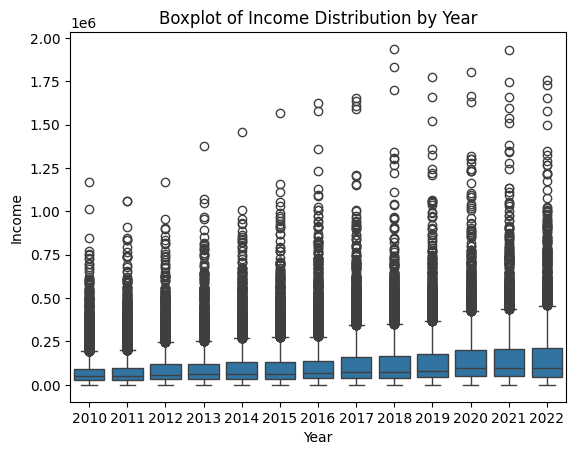

In [116]:
sns.boxplot(x='Year', y='Income', data=income_df)
plt.title('Boxplot of Income Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Income')
plt.show()

Looking at the boxplots over time, we can see that the interquartile range steadily increases over time and the upper whisker significantly increases over time. Of course, there are a lot of upper outliers in each year since this dataset consists of all jobs in UCSD. The top income outliers also seem to increase over time too, peaking at 2018 and 2021.

#### We will now look at the income distribution using a histogram.

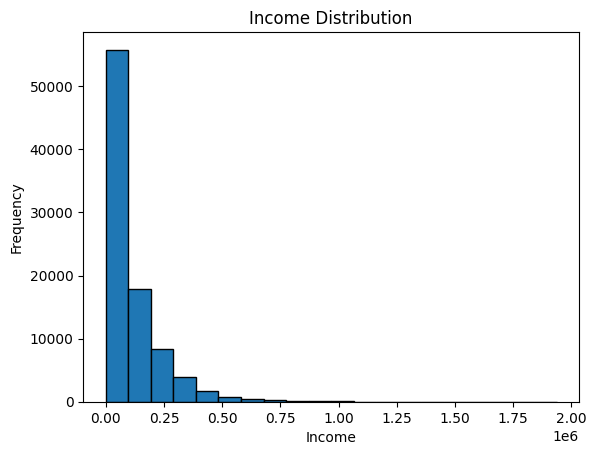

In [117]:
plt.hist(income_df['Income'], bins=20, edgecolor='black')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

The distribution heavily skews left, so we should relook at a closer view of the distribution by capping the x-axis to say, $750K.

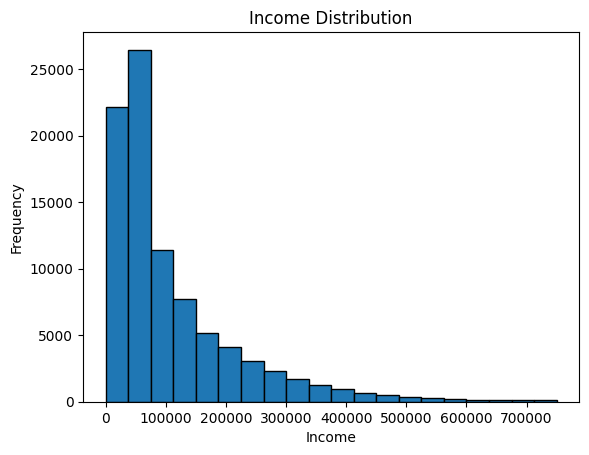

In [118]:
# Using range parameter to limit x-axis
plt.hist(income_df['Income'], bins=20, range=(0, 750000), edgecolor='black')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

Looking at the distribution, the majority of employees in the dataset make less than \\$100K. Because the range is \\$750K with 20 bins, each bar represents \\$750K/20 = \\$37.5K. This means that the mode of this distribution is the bar that represents \\$37.5-75K. This distribution makes sense to all employees in UCSD but it is not accurate for the income distribution of all professors and lecturers.

#### What is the top jobs consist of in the income database.

In [119]:
top50_jobs = income_df['Job Title'].value_counts().head(50)
top50_jobs

Job Title
POSTDOC-EMPLOYEE                18322
PROF-AY                          4256
HS ASST CLIN PROF-HCOMP          3202
HS CLIN PROF-HCOMP               2810
ADMIN SPEC                       2697
PROF-HCOMP                       2668
HS ASSOC CLIN PROF-HCOMP         2528
ADMIN ANL                        2331
LECT-AY-1/9                      2203
PROF-AY-B/E/E                    1813
ASSOC PROF-AY                    1706
ASST PROF-AY                     1593
ADMIN ANL SR                     1451
ASST ADJ PROF-HCOMP              1161
PROF OF CLIN-HCOMP               1134
STAFF RESEARCH ASSOC II          1067
LECT-AY                          1050
ADMIN OFCR 2                      975
ADMIN. SPECIALIST                 939
STAFF RESEARCH ASSOC I            898
LECT-AY-CONTINUING                890
PROF IN RES-HCOMP                 772
ASSOC PROJ SCIENTIST-FY           751
PROFESSOR - ACADEMIC YEAR         748
LECT IN SUMMER SESSION            745
RECALL FACULTY                    717
AS

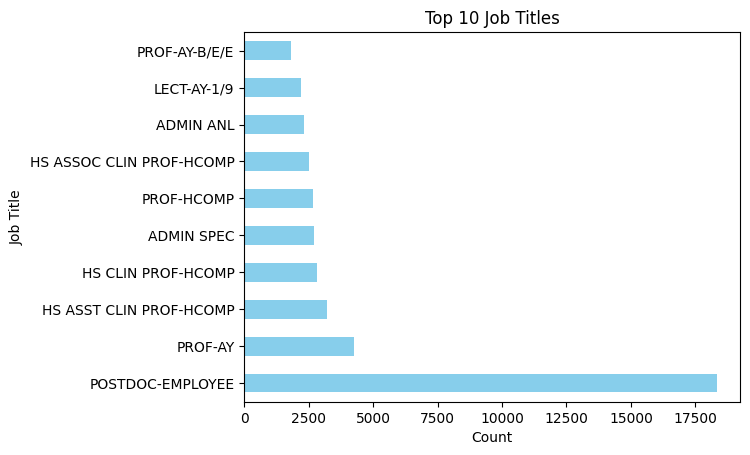

In [120]:
# Horizontal barplot of the top 10 most common UCSD jobs
top_jobs = income_df['Job Title'].value_counts().head(10)
top_jobs.plot(kind='barh', color='skyblue')
plt.title('Top 10 Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()

It seems that out of the top 10 job titles, the majority of them are related to medical fields and research. Doing a quick google search, SRA and BLANK AST refers to research and assistant titles respectively. Looking at [this website](https://www.ucop.edu/academic-personnel-programs/_files/acad-title-codes/academic-titles-sorted-title-code.pdf) that displays a table of codes to academic titles, we can see that PROF-AY means tenured professor, TEACHER-UNEX-CONTRACT YR means a university extension teacher, and of course POSTDOC-EMPLOYEE refers to postdoc scholars. Postdoc scholars are mainly focused on research rather than teaching. This means that only a small fraction of the income dataset relates to teaching and classes at UCSD.

Now that we can identify which jobs are teaching related, we could look at the income distributions for those job titles.

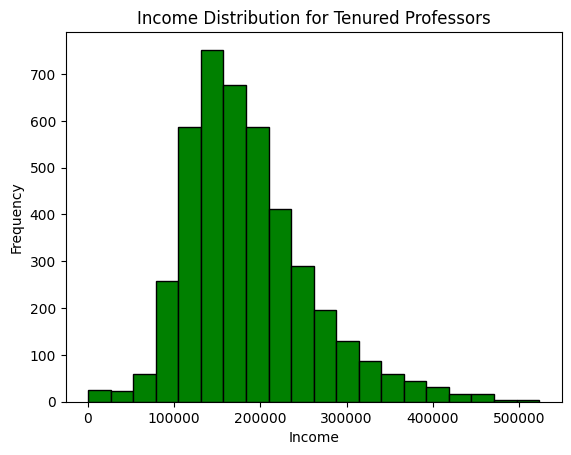

In [121]:
# Tenured Professor Plot
prof_ay_df = income_df[income_df['Job Title'] == 'PROF-AY']
plt.hist(prof_ay_df['Income'], bins=20, color='green', edgecolor='black')
plt.title('Income Distribution for Tenured Professors')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

This is important to note as some of the highest paid professors are shown to be tenured. Their longevity equates generally in a higher income, as shown in the positively skewed barplot. The median as well being around \\$175k-\\$200k for the tenured professors at UCSD.

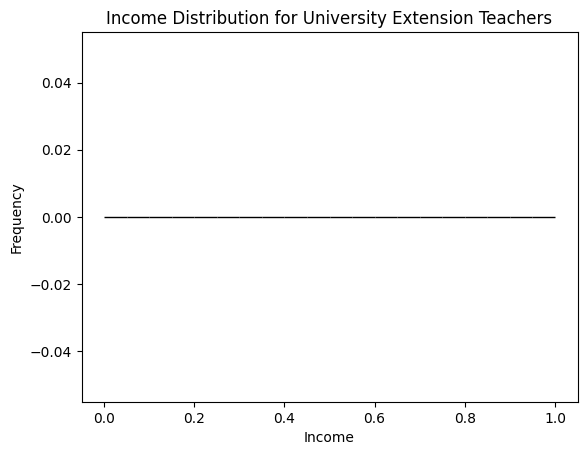

In [122]:
# University Extension Teacher Plot
prof_ex_df = income_df[income_df['Job Title'] == 'TEACHER-UNEX-CONTRACT YR']
plt.hist(prof_ex_df['Income'], bins=20, color='green', edgecolor='black')
plt.title('Income Distribution for University Extension Teachers')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

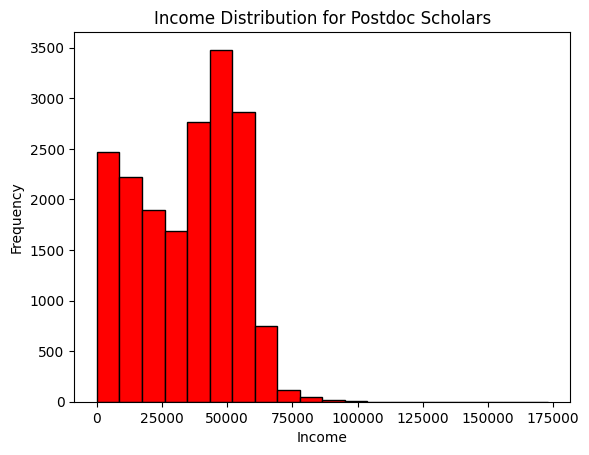

In [123]:
# Postdoc Scholar PLot
prof_pd_df = income_df[income_df['Job Title'] == 'POSTDOC-EMPLOYEE']
plt.hist(prof_pd_df['Income'], bins=20, color='red', edgecolor='black')
plt.title('Income Distribution for Postdoc Scholars')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

The income distribution for tenured professors is very wide and the range is around \$500K. The mode seems to be around \$150K. This could be due to the fact that a tenured professor's income depends on a lot of factors, such as their length of tenure, years of experience, as well as their quality and quantity of research and teaching.

For university extension teachers, their income distribution is heavily skewed to the left, with the vast majority earning less than \$25K. This may be because extension classes last a shorter time and many of the classes are held online through Zoom.

The income distribution for postdoc scholars is interesting, since there are a wide variety of postdocs earning a range from \$0 to \$60K. After that, the distribution heavily tapers off, with not many postdocs earning more than \$60K and even fewer earning more than \$70K.

### How Many Unique Instructors Per Year

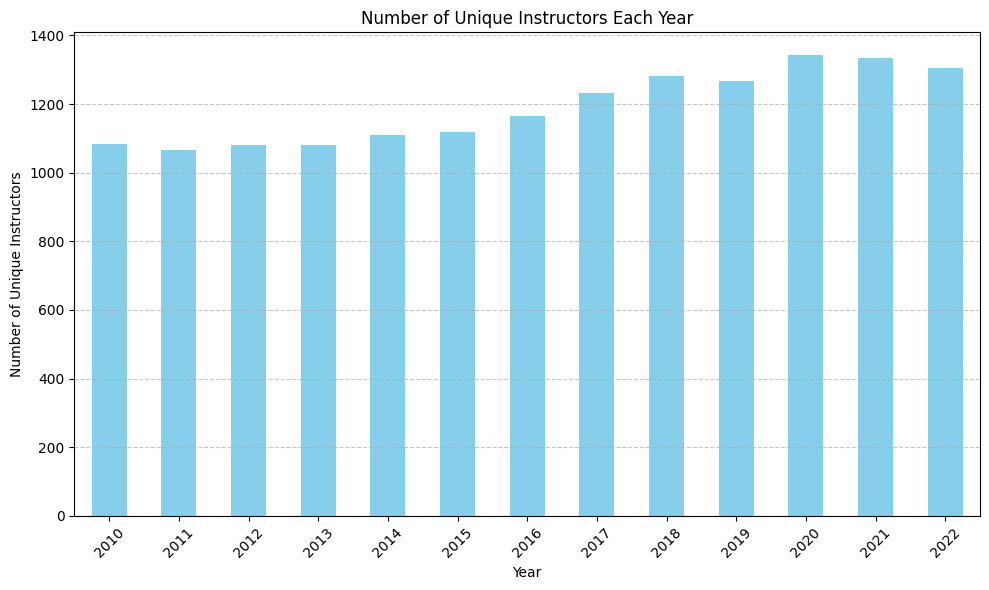

In [124]:
instructor_counts = merged_df.groupby('Year')['Instructor'].nunique()
plt.figure(figsize=(10, 6))
instructor_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Unique Instructors Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Unique Instructors')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

We can see the number of unique instructors is fairly stable throughout the years 2010-2022 and there isn't a large spike up or down during this time. We Can see a small increase during 2020 which could have something to do with classes turning online because of COVID. However, we have no evidence to support that claim.

### Trend of Average Income Over the Years

This is different from the average income trend above because this is focusing only on professors in the merged dataframe*

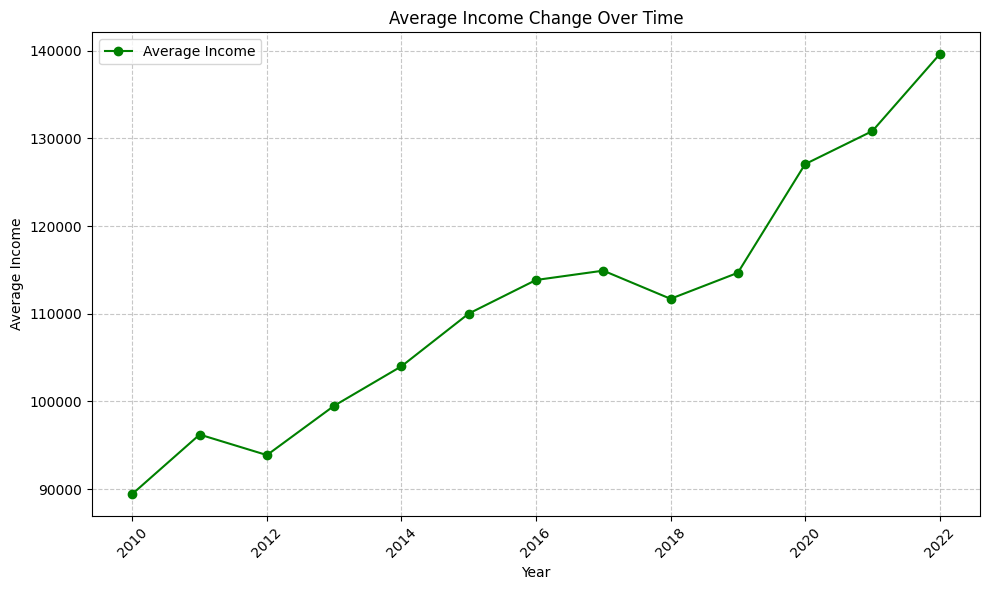

In [125]:
income_avg = merged_df.groupby('Year')['Income'].mean()

plt.figure(figsize=(10, 6))

# Plotting average income
income_avg.plot(kind='line', marker='o', color='green', label='Average Income')

# Labelling 
plt.title('Average Income Change Over Time')
plt.xlabel('Year')
plt.ylabel('Average Income')
plt.xticks(rotation=45)

# Grid + Legend
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()

This shows a large increase in average income from \\$90,000 in 2010 to \\$140,000 in 2022. This is understandable with inflation rates going up and general incomes going up (especially in larger departments such as STEM) as those departments (stayed previously) are the most costly.

In [126]:
merged_df.describe()

,Year,Percentage_Responded,Total_Enrolled,Total_Response,Percentage_Recommended_Class,Percentage_Recommended_Professor,Study_Hours_per_Week,Average_Grade_Received,Income
count,42869.000000,42869.000000,42869.000000,42869.000000,42869.000000,42869.000000,42869.000000,42869.000000,42869.000000
mean,2016.339010,49.371256,80.608272,40.004689,89.212921,89.460575,5.808597,3.325054,112448.643865
std,3.787888,19.945474,90.025825,50.053381,12.510501,14.420150,2.553772,0.398387,73355.225013
min,2010.000000,5.080000,3.000000,3.000000,0.000000,0.000000,0.500000,0.550000,300.000000
25%,2013.000000,35.140000,21.000000,9.000000,83.300000,84.600000,4.170000,3.040000,62548.000000
50%,2017.000000,45.160000,43.000000,19.000000,92.600000,94.700000,5.500000,3.360000,102422.350000
75%,2020.000000,60.000000,109.000000,51.000000,100.000000,100.000000,7.140000,3.660000,150500.000000
max,2022.000000,100.000000,1101.000000,588.000000,100.000000,100.000000,20.500000,4.000000,707972.000000


In [127]:
unique_quarters = merged_df['Quarter'].unique()
unique_quarters

array(['FA', 'S3', 'S2', 'S1', 'SP', 'WI', 'SU'], dtype=object)

### Average Grade of Each Quarter Per Year

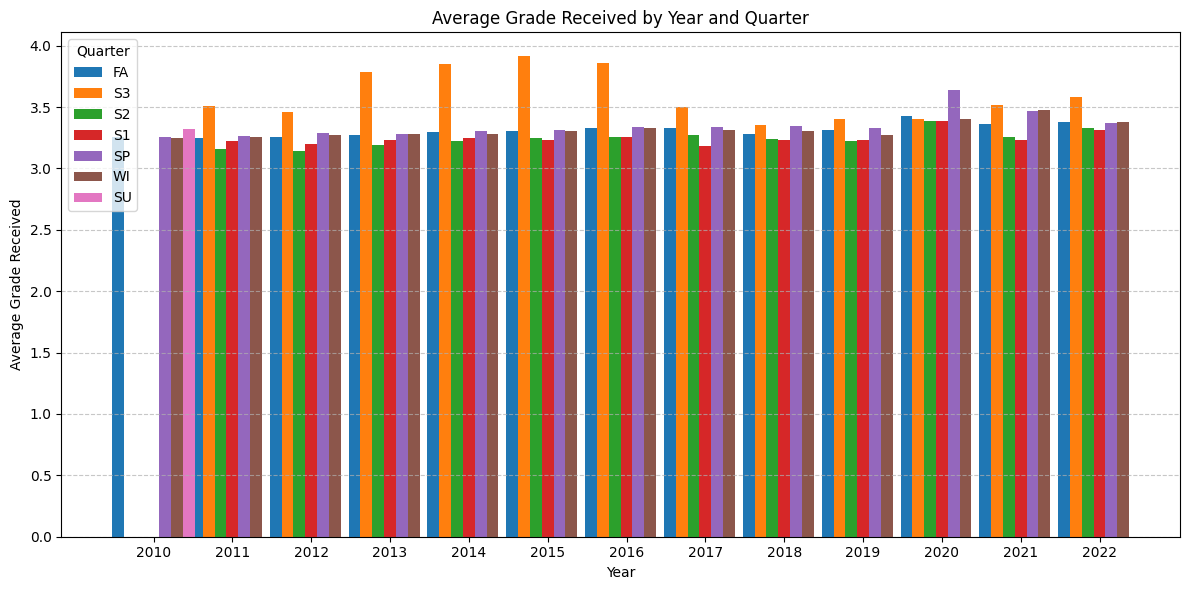

In [128]:
avg_grade_by_year_quarter = merged_df.groupby(['Year', 'Quarter'])['Average_Grade_Received'].mean().unstack()

# Get unique quarters
quarters = merged_df['Quarter'].unique()

bar_width = 0.15

plt.figure(figsize=(12, 6))

for i, quarter in enumerate(quarters):
    # x position of each bar
    x = np.arange(len(avg_grade_by_year_quarter.index)) + (bar_width * i) - (bar_width * (len(quarters) - 1) / 2)
    
    plt.bar(x, avg_grade_by_year_quarter[quarter], width=bar_width, label=quarter)

# Labelling
plt.title('Average Grade Received by Year and Quarter')
plt.xlabel('Year')
plt.ylabel('Average Grade Received')
plt.xticks(np.arange(len(avg_grade_by_year_quarter.index)), avg_grade_by_year_quarter.index)
plt.legend(title='Quarter')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

We wanted to see if there were any discrepancies in the average grade receieved for the different quarters. First thing to note is there is no large difference except for summer session 3 in 2013-2016. Another issue is the gap in 2010 for the different summer sessions. We also do not have an explanation for what occurred during that time that caused such a gap in the average grade receieved.

### Average Grade Received Year to Year

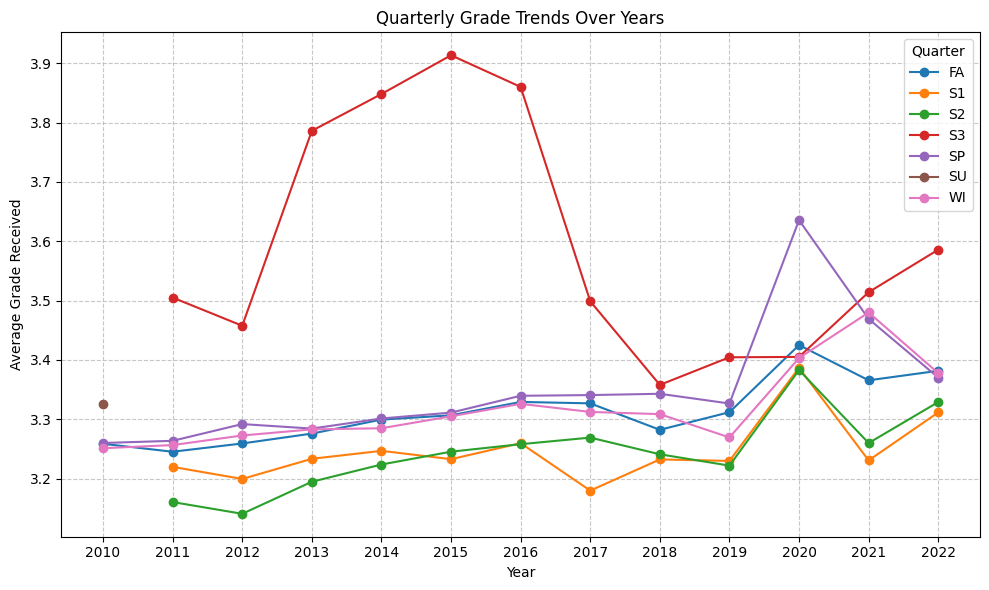

In [129]:
avg_grade_by_year_quarter = merged_df.groupby(['Year', 'Quarter'])['Average_Grade_Received'].mean().unstack()

plt.figure(figsize=(10, 6))

for quarter in avg_grade_by_year_quarter.columns:
    plt.plot(avg_grade_by_year_quarter.index, avg_grade_by_year_quarter[quarter], marker='o', label=quarter)

plt.title('Quarterly Grade Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Average Grade Received')
plt.xticks(avg_grade_by_year_quarter.index)
plt.legend(title='Quarter')

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

We can see a small increase that is fairly stable as the years go on. We see a massive spike in all quarters during the year 2020. This was during the COVID Pandemic which saw all classes go online. This explains the increase in average grade as online classes equate to more resources being open for use, and of course cheating. As classes come back to being in person in 2021 and 2022, we see the averages start to trend down but are still higher than previous years. This could be explained by the lasting effects from the COVID era with classes being hybrid, full on remote, or much more flexible as a whole.

# Creating our Random Forest Regression Model

Prediction: We want to create a prediction model that predicts the GPA students expect for taking the course
        Some attribute that we are anticipating to improve the model are, When the course was held, professor income, professor rating, professor department, and the number of students enrolled in the class.


Supervised Machine Learning: training the model on input and output data 
- Classification 
- Regression 
- Clustering 


We decided to use a Random Forest Model since it provides the highest accuracy given our test data input. A Random forest model generates many trees that are not mutually coorelated, and this contributes to results that are more reliable and ultimately more accurate than simple decsion trees. To test validity we create an 80 20 split for our data. 80% of our data will be used for training and 20% will be used for testing.

In [11]:
# Assuming 'merged_df' is your DataFrame and contains all your data
X = merged_df[['Quarter', 'Department', 'Income', 'Percentage_Recommended_Professor', 'Total_Enrolled']]  # Features
y = merged_df['Average_Grade_Received']  # Target variable

# Split the data - 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

NameError: name 'merged_df' is not defined

In [144]:
# Example preprocessing for numerical and categorical data
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns

# Creating transformers for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ])

# Fit on the training data and transform both training and testing data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [145]:
# Initialize and train your model
model = RandomForestRegressor(n_estimators=100, random_state=0, oob_score=True)
model.fit(X_train_preprocessed, y_train)

RandomForestRegressor(oob_score=True, random_state=0)

In [146]:
# Predict on the test set
y_pred = model.predict(X_test_preprocessed)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Out-of-Bag Score: {model.oob_score_}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Out-of-Bag Score: 0.42653942731678895
Mean Squared Error: 0.0895890104352871
R-squared: 0.42551647895769207


In [10]:
# Assuming regressor is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = regressor.estimators_[0]
 
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=merged_df.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

NameError: name 'regressor' is not defined

### Correlation Matrix Between Income, Average_Grade_Received, and Year

In [148]:
correlation_matrix = merged_df[['Income', 'Average_Grade_Received', 'Year', 'Percentage_Recommended_Professor', 'Total_Enrolled']].corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                                    Income  Average_Grade_Received      Year  \
Income                            1.000000               -0.072736  0.191823   
Average_Grade_Received           -0.072736                1.000000  0.131572   
Year                              0.191823                0.131572  1.000000   
Percentage_Recommended_Professor -0.059819                0.308297  0.097899   
Total_Enrolled                    0.052317               -0.284671  0.015461   

                                  Percentage_Recommended_Professor  \
Income                                                   -0.059819   
Average_Grade_Received                                    0.308297   
Year                                                      0.097899   
Percentage_Recommended_Professor                          1.000000   
Total_Enrolled                                           -0.164929   

                                  Total_Enrolled  
Income                     

We calculated a correlation matrix to see if the 5 variables Income, Average_Grade_Received, Year, Percentage_Recommended_Professor, and Total_Enrolled had any strong correlations. Since each off-diagonal value was under 0.7, there is no strong correlation between any of these variables.

After running our model, we look at 3 main values to analyze the accuracy of the model: Out of Bag score (OOB), Mean Squared Error (MSE), and R-squared. The OOB value of 0.42 is low which means that with new unseen values, the model doesn't provide an accurate prediction. 

The MSE value of 0.0895 is good as it means the prediction values have a strong fit with the data overall. However a big flaw is the R squared value. The low value of 0.4255 means the model only accounts for 42.55% of the variance which is not a good number to have for a prediction model. In a perfect world, you want a model that accounts for 100% of the variance. However, ours only accounts for 42.55%. When looking at the correlation matrix created above, it shows a lack of correlation amongst our quantified feature variables and our target variable. This could be a potential explanation for why our model is inaccurate for seen and unseen data.

When looking at the tree structure above, there are many branches and varying depths. This is because we set n_estimators = 100 above. This allows for more complex trees to be made to contribute to a more accurate model. While hard to interpret, this tree resembles the model working to determine the connections between features.

Given more time, an improvement that could be made to this model would be exploring different approaches that can handle more complex feature variables with less correlation to create a prediction. This way, at the very least, our predictions for our test data would be more accurate. Given our current model, we're neither accurate with our test data nor any unseen/new data. It would be worth exploring different, more complex models to solve this issue.

### Potential Confound
A potential confound we want to address is for our professor ratings, not everyone filled out the survey. While we were able to explain why some scenarios had an increase in positive or negative reviews given certain circumstances, not having a consistent threshold of percentage of the class completing the survey is a confound which is hard to account for. In a perfect world, everyone would fill out the review honestly based on the professor's performance and leave out biases such as personal performance. However, we can't create that scenario, so we can only mention that as a confound with our model. 

# Ethics & Privacy

- Thoughtful discussion of ethical concerns included
- Ethical concerns consider the whole data science process (question asked, data collected, data being used, the bias in data, analysis, post-analysis, etc.)
- How your group handled bias/ethical concerns clearly described

Acknowledge and address any ethics & privacy related issues of your question(s), proposed dataset(s), and/or analyses. Use the information provided in lecture to guide your group discussion and thinking. If you need further guidance, check out [Deon's Ethics Checklist](http://deon.drivendata.org/#data-science-ethics-checklist). In particular:

- Are there any biases/privacy/terms of use issues with the data you propsed?
- Are there potential biases in your dataset(s), in terms of who it composes, and how it was collected, that may be problematic in terms of it allowing for equitable analysis? (For example, does your data exclude particular populations, or is it likely to reflect particular human biases in a way that could be a problem?)
- How will you set out to detect these specific biases before, during, and after/when communicating your analysis?
- Are there any other issues related to your topic area, data, and/or analyses that are potentially problematic in terms of data privacy and equitable impact?
- How will you handle issues you identified?

# Discusison and Conclusion

From the random forest regression model and our analysis of the correlation between quarter and average grade received, we can see that there is not a strong enough correlation to justify a causal relationship between which quarter to take a course and the average grade received. The model we created to predict grades was ineffective for lack of correlation and its inability to handle seen and unseen data. While uneffective, we still were anble to answer the question proposed above. Some key findings worth mentioning are the professor ratings and grade recieved correlations. We saw a positive correlation showing that with a higher grade received, more students were likely to fill out the form saying good things about the professor. This is in line with what our previous work has mentioned. We added onto their work by incorporating professors income which helped showcase the resource allocation imbalance for classes in STEM vs Non-STEM based classes. This however didn't result in a a direct effect with the average grade received. One thing worth noting on this is that we showed how the courses with the lower average GPA were those from the STEM departments that have more resources allocated. While the resources aren't connected to grades, it just shows that those departments are harder to succeed in, which is true for a variety of reasons mentioned (ie: grading policies, work load, material covered).

# Team Expectations 


Read over the [COGS108 Team Policies](https://github.com/COGS108/Projects/blob/master/COGS108_TeamPolicies.md) individually. Then, include your group’s expectations of one another for successful completion of your COGS108 project below. Discuss and agree on what all of your expectations are. Discuss how your team will communicate throughout the quarter and consider how you will communicate respectfully should conflicts arise. By including each member’s name above and by adding their name to the submission, you are indicating that you have read the COGS108 Team Policies, accept your team’s expectations below, and have every intention to fulfill them. These expectations are for your team’s use and benefit — they won’t be graded for their details.

* *Team Expectation 1*
* *Team Expectation 2*
* *Team Expecation 3*
* ...

# Project Timeline Proposal

Specify your team's specific project timeline. An example timeline has been provided. Changes the dates, times, names, and details to fit your group's plan.

If you think you will need any special resources or training outside what we have covered in COGS 108 to solve your problem, then your proposal should state these clearly. For example, if you have selected a problem that involves implementing multiple neural networks, please state this so we can make sure you know what you’re doing and so we can point you to resources you will need to implement your project. Note that you are not required to use outside methods.



| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 1/20  |  1 PM | Read & Think about COGS 108 expectations; brainstorm topics/questions  | Determine best form of communication; Discuss and decide on final project topic; discuss hypothesis; begin background research | 
| 1/26  |  10 AM |  Do background research on topic | Discuss ideal dataset(s) and ethics; draft project proposal | 
| 2/1  | 10 AM  | Edit, finalize, and submit proposal; Search for datasets  | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part   |
| 2/14  | 6 PM  | Import & Wrangle Data (Ant Man); EDA (Hulk) | Review/Edit wrangling/EDA; Discuss Analysis Plan   |
| 2/23  | 12 PM  | Finalize wrangling/EDA; Begin Analysis (Iron Man; Thor) | Discuss/edit Analysis; Complete project check-in |
| 3/13  | 12 PM  | Complete analysis; Draft results/conclusion/discussion (Wasp)| Discuss/edit full project |
| 3/20  | Before 11:59 PM  | NA | Turn in Final Project & Group Project Surveys |